<a href="https://colab.research.google.com/github/dr-mushtaq/Machine-Learning/blob/master/Supervised_(Classification)_ML_Model_Training_and_Evulation_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 1px; color:#207d06; font-size:100%; text-align:left;padding: 0px; border-bottom: 3px solid #207d06;">**Table of Content**</p>




*   Introduction
*   Importing Necessary libraries
*   Load a Dataset
*   Convert target variable into binary Form
*   Hot Encoding
*   Data spliting
*   Classification Model Training and Evaluation




#<p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 1px; color:#207d06; font-size:100%; text-align:left;padding: 0px; border-bottom: 3px solid #207d06;">**1- Introduction**</p>

**Prerequisites**

Machine learning classification is a type of supervised learning where the goal is to categorize data into predefined classes or labels. A classifier learns from a labeled training dataset, which contains input-output pairs. The model then uses this knowledge to predict labels for new, unseen data.

In [ ]:
!pip install Numpay
!pip install scikit-learn
!pip install Pandas

**pip: Python's Package Installer**

pip (short for Pip Installs Packages) is the standard package manager for Python. It is used to install and manage additional libraries and dependencies that are not included in Python's standard library. With pip, you can easily download, install, upgrade, and uninstall Python packages from the Python Package Index (PyPI) and other repositories.

In [ ]:
!pip install package_name



#<p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 1px; color:#207d06; font-size:100%; text-align:left;padding: 0px; border-bottom: 3px solid #207d06;">**2- Importing Necessary libraries**</p>

In [20]:
import numpy as np
# NumPy is an open-source Python library used for numerical computations and data manipulation
import pandas as pd
#Pandas is an open-source Python library designed for data manipulation and analysis. It provides powerful data structures, such as DataFrames and Series
import seaborn as sns
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from mlxtend.plotting import plot_confusion_matrix
#It provides various visualization tools to help with the interpretation and presentation of machine learning results.
#This module includes functions for plotting decision regions, confusion matrices, and other statistical or machine learning-related visualizations.
import warnings
warnings.filterwarnings("ignore")

Here we are importing some of the Scikit-Learn Algorithms along with the some other functions.

In [2]:
from sklearn.model_selection import train_test_split
# The sklearn.model_selection module in scikit-learn provides tools for splitting datasets, evaluating models, and optimizing hyperparameters
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc


#<p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 1px; color:#207d06; font-size:100%; text-align:left;padding: 0px; border-bottom: 3px solid #207d06;">**3- Load a Dataset**</p>

You can use a dataset from scikit-learn or upload your own.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
Train_data = pd.read_csv('/content/drive/MyDrive/Datasets (1)/Student field Recommendation /Placement_Data_Full_Class.csv',encoding = 'latin')

In [3]:
Train_data

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0



#<p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 1px; color:#207d06; font-size:100%; text-align:left;padding: 0px; border-bottom: 3px solid #207d06;">**4- Convert target variable into binary Form**</p>

In [6]:
Train_data['specialisation'].replace({'Mkt&Fin': 0, 'Mkt&HR': 1},inplace = True)

<ipython-input-6-f01c687635fa>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Train_data['specialisation'].replace({'Mkt&Fin': 0, 'Mkt&HR': 1},inplace = True)



#<p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 1px; color:#207d06; font-size:100%; text-align:left;padding: 0px; border-bottom: 3px solid #207d06;">**5- Hot Encoding**</p>

In [7]:
Train_data.select_dtypes(include=['object']).columns


Index(['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'status'], dtype='object')

In [8]:
data=Train_data

In [10]:
data['gender'] = data['gender'].fillna(data['gender'].mode()[0])
data['ssc_b'] = data['ssc_b'].fillna(data['ssc_b'].mode()[0])
data['hsc_b'] = data['hsc_b'].fillna(data['hsc_b'].mode()[0])
data['hsc_s'] = data['hsc_s'].fillna(data['hsc_s'].mode()[0])
data['degree_t'] = data['degree_t'].fillna(data['degree_t'].mode()[0])
data['workex'] = data['workex'].fillna(data['workex'].mode()[0])
data['specialisation'] = data['specialisation'].fillna(data['specialisation'].mode()[0])
data['status'] = data['status'].fillna(data['status'].mode()[0])

In [9]:
# Convert categorical features to continuous features with Label Encoding
from sklearn.preprocessing import LabelEncoder
lencoders = {}
for col in data.select_dtypes(include=['object']).columns:
    lencoders[col] = LabelEncoder()
    data[col] = lencoders[col].fit_transform(data[col])

In [10]:
import warnings
warnings.filterwarnings("ignore")
# Multiple Imputation by Chained Equations
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
MiceImputed = data.copy(deep=True)
mice_imputer = IterativeImputer()
MiceImputed.iloc[:, :] = mice_imputer.fit_transform(data)

In [11]:
MiceImputed

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1,270000.000000
1,2,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,200000.000000
2,3,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1,250000.000000
3,4,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0,288655.133065
4,5,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1,425000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,1,80.60,1,82.00,1,1,77.60,0,0,91.0,0,74.49,1,400000.000000
211,212,1,58.00,1,60.00,1,2,72.00,2,0,74.0,0,53.62,1,275000.000000
212,213,1,67.00,1,67.00,1,1,73.00,0,1,59.0,0,69.72,1,295000.000000
213,214,0,74.00,1,66.00,1,1,58.00,0,0,70.0,1,60.23,1,204000.000000


In [12]:
MiceImputed = MiceImputed.dropna(axis = 0, how ='any')


In [13]:
MiceImputed.fillna(method = 'ffill', axis = 0)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1,270000.000000
1,2,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,200000.000000
2,3,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1,250000.000000
3,4,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0,288655.133065
4,5,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1,425000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,1,80.60,1,82.00,1,1,77.60,0,0,91.0,0,74.49,1,400000.000000
211,212,1,58.00,1,60.00,1,2,72.00,2,0,74.0,0,53.62,1,275000.000000
212,213,1,67.00,1,67.00,1,1,73.00,0,1,59.0,0,69.72,1,295000.000000
213,214,0,74.00,1,66.00,1,1,58.00,0,0,70.0,1,60.23,1,204000.000000



#<p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 1px; color:#207d06; font-size:100%; text-align:left;padding: 0px; border-bottom: 3px solid #207d06;">**6- Data spliting**</p>

In [14]:
X=MiceImputed.drop('specialisation',axis=1)

In [15]:
y=MiceImputed[['specialisation']]


In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)


#<p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 1px; color:#207d06; font-size:100%; text-align:left;padding: 0px; border-bottom: 3px solid #207d06;">**7- Classification Model Training and Evaluation**</p>

We will train a model over a set of training data, providing it a machine-learning algorithm that it can learn from those data and predict future data.

![](https://drive.google.com/uc?export=view&id=1_Qov2L2cAZzFKcf5UY3bMc6ITdnpKfkJ)

## **6.1-Decision Trees**

### **Model Training**

In [17]:
from sklearn.tree import DecisionTreeClassifier
DTC=DecisionTreeClassifier(random_state=0, max_depth=2)
DTC_Model= DTC.fit(X_train , y_train)
DTC_Model

DecisionTreeClassifier(max_depth=2, random_state=0)

###**Model evaluation**

**Predict Class Probability**

In [ ]:
preds_proba = DTC_Model.predict_proba(X_test)
print("class = ", preds_proba)

class =  [[0.45535714 0.54464286]
 [0.45535714 0.54464286]
 [0.45535714 0.54464286]
 [0.45535714 0.54464286]
 [0.45535714 0.54464286]
 [0.45535714 0.54464286]
 [0.45535714 0.54464286]
 [0.45535714 0.54464286]
 [0.45535714 0.54464286]
 [0.84615385 0.15384615]
 [0.45535714 0.54464286]
 [0.45535714 0.54464286]
 [0.45535714 0.54464286]
 [0.45535714 0.54464286]
 [0.45535714 0.54464286]
 [0.45535714 0.54464286]
 [0.45535714 0.54464286]
 [0.45535714 0.54464286]
 [0.45535714 0.54464286]
 [0.95833333 0.04166667]
 [0.45535714 0.54464286]
 [0.45535714 0.54464286]
 [0.45535714 0.54464286]
 [0.45535714 0.54464286]
 [0.45535714 0.54464286]
 [0.95833333 0.04166667]
 [0.45535714 0.54464286]
 [0.45535714 0.54464286]
 [0.95833333 0.04166667]
 [0.45535714 0.54464286]
 [0.95833333 0.04166667]
 [0.84615385 0.15384615]
 [0.45535714 0.54464286]
 [0.45535714 0.54464286]
 [0.45535714 0.54464286]
 [0.45535714 0.54464286]
 [0.45535714 0.54464286]
 [0.45535714 0.54464286]
 [0.45535714 0.54464286]
 [0.45535714 0.5

**Accuracy**

In [ ]:
y_pred_DT = DTC.predict(X_test)
DT_Acc=DTC.score(X_test, y_test)
print('Accuracy score= {:.4f}'.format(DTC.score(X_test, y_test)))

Accuracy score= 0.5538


**Confusion Matrix**



confusion matrix


[[10 25]
 [ 4 26]]




NameError: name 'plt' is not defined

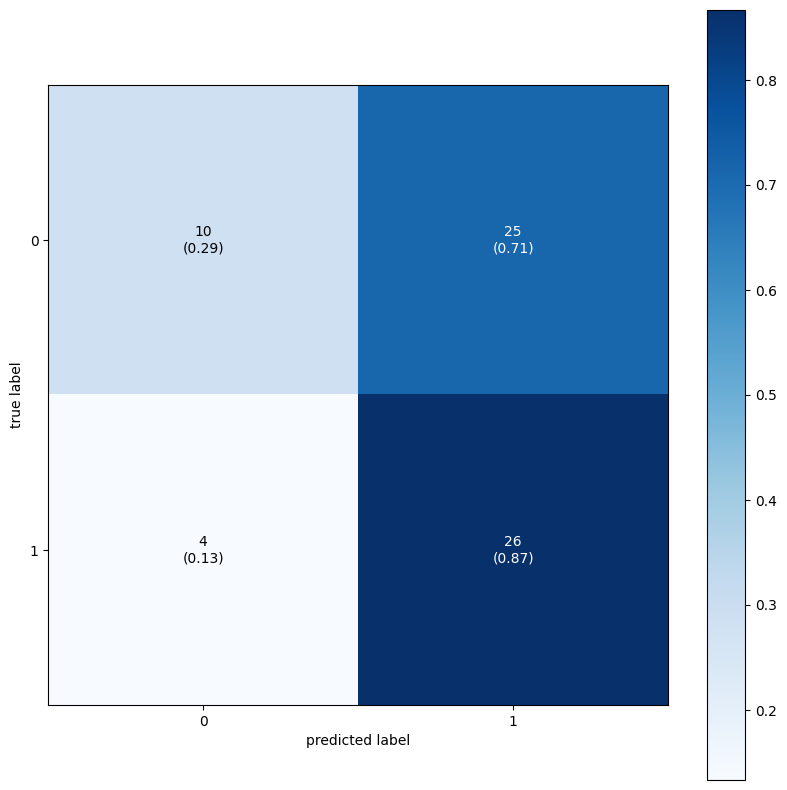

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
print('\n')
print("confusion matrix")
print('\n')
CR=confusion_matrix(y_test, y_pred_DT)
print(CR)
print('\n')

fig, ax = plot_confusion_matrix(conf_mat=CR,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

**Precision, Recall, F1**

In [ ]:
print('\n')
print("Precision, Recall, F1")
print('\n')
CR=classification_report(y_test, y_pred_DT)
print(CR)
print('\n')



Precision, Recall, F1


              precision    recall  f1-score   support

         0.0       0.71      0.29      0.41        35
         1.0       0.51      0.87      0.64        30

    accuracy                           0.55        65
   macro avg       0.61      0.58      0.53        65
weighted avg       0.62      0.55      0.52        65





**ROC CURVE**

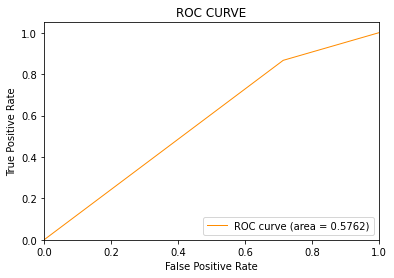

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr_DT, tpr_DT, thresholds = roc_curve(y_test, y_pred_DT)
roc_auc_DT = auc(fpr_DT, tpr_DT)
plt.figure()
plt.plot(fpr_DT, tpr_DT, color='darkorange', lw=1, label='ROC curve (area = %0.4f)' % roc_auc_DT)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

### **Model Tunning**

Hyperparameter is used for choosing the optimal parameters for learning the model so that our model can solve the data science problem effectively.

In [ ]:
#Importing the modules
import pandas as pd
import seaborn as sns
#Loading the dataset
planets = sns.load_dataset('planets')
#Showing 10 first row in the planets data
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


Model optimization techniques play a very crucial role in the field of machine learning. These optimization techniques are also used for hyperparameter tuning, leading to better-performing machine learning models for a given dataset. This article shows different ways of hyperparameter tuning of machine learning models in Python[19]

These techniques are often the first step after exploratory data analysis to cross-check if the input features in a given dataset have enough prediction power or not. Also, it is an efficient way to explore various models, and later one can choose the top 10% high performing models for further studies. Once we have few models in our bag which are the plausible candidate to perform well on the dataset, then hyperparameter tuning of these models is done to make them even better. One should also perform cross-validation to evaluate model performance and employ different regularization techniques to avoid over-fitting while training the model. The figure below shows the different methods to perform hyperparameter tuning.[19]

![](https://drive.google.com/uc?export=view&id=1045WF9Qol51GqdFSHk79gG9J_eyVyv7u)

Hyperparameters are the model settings specified before the model training process and can’t be changed while training. These settings are tuned for specific problems and can help to make models more skillful. An example of hyperparameters could be the depth and width of neural networks or n_estimators and num_leaves for tree-based models.
On the other hand, the machine learning model learns model parameters during the training process. Examples of model parameters could be the weights of neural networks or slope and intercept of linear regression[19]

![](
https://drive.google.com/uc?export=view&id=1bJyiC1Fzeytgn8ZZfY4fV_UaiBRp7j8T)

**Behind the scenes of hyperparameter tuning**

There exist several libraries in Python that offers an easy way to implement hyperparameter optimization. However, this article starts with the core concepts, such as essential functions used behind the scenes, making it easier for readers to understand Bayesian search optimization using hyperopt. The figure below shows the functions behind the optimization technique.[19]

#### **Manual Search**[19]

Manual search is an inefficient way of hyperparameter tuning. Why inefficient? The number of hyperparameters in the model may result in different combinations to try upon. Manual search means random guessing and keeping a record of the best combinations of hyperparameters which is difficult and time-consuming.

#### **GridSearchCV**

The grid search algorithm sequentially trains the model for every possible combination of hyperparameter values defined in the search space. Assuming the defined search space contains the optimum hyperparameter of the model suitable for the dataset, the grid search would find it. However, it is an inefficient technique because it is computationally intensive.
As stated before, hyperparameter optimization has four methods behind the scene. The code below shows the objective function[19]

The model evaluates all possible combinations in search space as there is no way to define the breakpoint or number of iterations in GridSearchCV. Hence, it is helpful to know how the algorithm works then one can tweak things as shown in the previous section (setting the MAX_EVALS). The animation below shows how actually grid search algorithm is running through search space. The size of the dot represents the standard deviation, and the gray star represents the best hyperparameter.

![](
https://drive.google.com/uc?export=view&id=1jf0DEvMlEGELdHVRLyABynqRDn9BsHJi)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [ ]:
n_samples = 24187
n_features = 9
# Define the hyperparameter configuration space

In [ ]:
grid = GridSearchCV(DecisionTreeClassifier(random_state=1), cv=3, n_jobs=-1, verbose=5,
                    param_grid ={
                    'criterion': ['gini', 'entropy'],
                    'max_depth': [None,1,2,3,4,5,6,7],
                    'max_features': [None, 'sqrt', 'auto', 'log2', 0.3,0.5,0.7, n_features//2, n_features//3, ],
                    'min_samples_split': [2,0.3,0.5, n_samples//2, n_samples//3, n_samples//5],
                    'min_samples_leaf':[1, 0.3,0.5, n_samples//2, n_samples//3, n_samples//5]},
                    )

In [ ]:
grid.fit(X_train, y_train)

Fitting 3 folds for each of 5184 candidates, totalling 15552 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=1), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 1, 2, 3, 4, 5, 6, 7],
                         'max_features': [None, 'sqrt', 'auto', 'log2', 0.3,
                                          0.5, 0.7, 4, 3],
                         'min_samples_leaf': [1, 0.3, 0.5, 12093, 8062, 4837],
                         'min_samples_split': [2, 0.3, 0.5, 12093, 8062, 4837]},
             verbose=5)

In [ ]:
print('Train Accuracy : %.3f'%grid.best_estimator_.score(X_train, y_train))
print('Test Accuracy : %.3f'%grid.best_estimator_.score(X_test, y_test))
print('Best Score Through Grid Search : %.3f'%grid.best_score_)
print('Best Parameters : ',grid.best_params_)

Train Accuracy : 1.000
Test Accuracy : 0.538
Best Score Through Grid Search : 0.640
Best Parameters :  {'criterion': 'entropy', 'max_depth': None, 'max_features': 0.5, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [ ]:
y_train

,specialisation
210,0
190,0
177,0
1,0
198,1
...,...
87,1
103,1
67,0
24,0


In [ ]:
MiceImputed

#### **Random Search**[18]

As the name suggests, a random search randomly picks up the combinations of hyperparameters from the search space. Initially, people were hesitant to use the random search as one can’t explain the random nature of this algorithm. However, many researchers showed that random search is highly efficient, and in fewer iterations, one can achieve good results.
Several articles claim that random search is faster than grid search, which is not technically accurate. It is efficient, not fast. For example, if you let run the random search for the same number of iteration as the grid search, it would take the same amount of time to evaluate all combinations.

**Why efficient?**

It is pretty simple to explain. Imagine in the given search space we have a combination of hyperparameter sets which result in lower RMSE. If we assume that each random draw from search space would have only a 5% chance to pick the right combination, then missing the desired combination would be (1–5%)^n. Suppose we need a success rate of 95% then (1–5%)^n = 95%, solve for n, which should be equal to 60. So, in just 60 iterations random search would provide decent results.
We need to change the algorithm for a random search. The objective function and search space would remain the same.

**An easy way: RandomSearchCV**

Of course, sklearn offers RandomSearchCV, which makes it easier to perform random search optimization without writing much code. For demonstration purposes, used the same search space (GridSearchCV) to make the result comparable. Below is the search space used.

In [ ]:
# import
from sklearn.model_selection import GridSearchCV, RepeatedKFold

# create a small version of parameter grid defined in Domain and name it as search space - Taking best parameter with little variation in number of leaves and number of estimators
search_space = {
    'boosting_type': ['gbdt'],
    'num_leaves': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20],
    'learning_rate': [0.005],
    'subsample_for_bin': [20000],
    'min_child_samples': [15],
    'reg_alpha': [0],
    'reg_lambda': [0],
    'colsample_bytree': [0.6],
    'subsample': [0.5],
    'is_unbalance': [True],
    'n_estimators': [1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500, 6000, 6500, 7000, 7500, 8000, 8500, 9000, 9500, 10000]
}

In [ ]:
# library
from sklearn.model_selection import RandomizedSearchCV

# use repeatedfold from sklearn library
model = lgb.LGBMRegressor()
cv = RepeatedKFold(n_splits=3, n_repeats=3, random_state=0)

# train model
# note: RandomizedSearchCV is maximizing the scoring, hence it is used neg_rmse
# Here i Will use 60 itration for Random search
# Remeber search space with n_estimators=19 and n_leaves=10
# Grid search tries all 190 combinations --> computation intensive
# To test Random search I will run for 60 iteration and then 100 iteration and see how close we get to the best parameters
RandomizedSearchCV_results = RandomizedSearchCV(model, search_space, n_iter=60, scoring='neg_mean_absolute_error', n_jobs=-1, cv=cv).fit(X_train,y_train)


NameError: name 'lgb' is not defined

The model runs for 60 iterations, in which it evaluates 60 random combinations. The animation below shows how a random search algorithm is running through search space. The size of the dot represents the standard deviation, and the green star represents the best hyperparameter.

![](https://drive.google.com/uc?export=view&id=1fxoTAHS1rJB5PwMb62oOHM81V0C0O-h0)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
model = DecisionTreeClassifier(random_state=42)

In [ ]:
model = DecisionTreeClassifier(random_state=42)

In [ ]:
param_dist = {
    "criterion": ["gini", "entropy", "log_loss"],  # Criterion for information gain
    "splitter": ["best", "random"],  # Strategy for choosing the split
    "max_depth": [None, 10, 20, 30],  # Depth of the tree
    "min_samples_split": [2, 5, 10],  # Minimum number of samples required to split
    "min_samples_leaf": [1, 2, 5],  # Minimum number of samples per leaf
}

In [ ]:
random_search = RandomizedSearchCV(
 estimator=model,
 param_distributions=param_dist,
 n_iter=50, # Number of parameter combinations to try
 cv=3, # Number of cross-validation folds
 verbose=2,
 random_state=42,
 n_jobs=-1 # Use all processors
)
# Fit the model
random_search.fit(X_train, y_train)
# Display the best parameters
print("Best Parameters:", random_search.best_params_)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Parameters: {'splitter': 'random', 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 30, 'criterion': 'log_loss'}


In [ ]:
from sklearn.metrics import accuracy_score
# Predict on the test set
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 67.69%


It took 24 iterations for random search to find the optimum hyperparameter of a model.

#### **Random + Grid Search**[18]

By default, grid search and random search are independent, meaning each iteration doesn’t know the result of the previous iteration. Hence, no learning is possible.

But what if the best hyperparameter from random search optimization with slight variation fed into grid search?

### **Create DT Rules**

**DT Rules**

In [ ]:
target = list(MiceImputed['RESULT_TEXT'].unique())
feature_names = list(X_train.columns)

In [ ]:
target

[0.0, 1.0]

In [ ]:
from sklearn.tree import export_text
r = export_text(DTC_Model, feature_names=feature_names)
print(r)

|--- TEHSIL <= 6.50
|   |--- REPORT_VERIFIED <= 7753.50
|   |   |--- class: 0.0
|   |--- REPORT_VERIFIED >  7753.50
|   |   |--- class: 0.0
|--- TEHSIL >  6.50
|   |--- AGE <= 24.50
|   |   |--- class: 0.0
|   |--- AGE >  24.50
|   |   |--- class: 1.0



### **Visualization**

In [ ]:
from sklearn import tree
import graphviz
dot_data = tree.export_graphviz(DTC_Model,
                                out_file=None,
                      feature_names=feature_names,
                      class_names=target,
                      filled=True, rounded=True)



#### **Bayesian Optimization**

In [ ]:
!pip install scikit-learn scikit-optimize


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 8.5 MB/s eta 0:00:00


In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
# Load Iris dataset
iris = load_iris()
X, y = iris.data, iris.target
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from skopt import BayesSearchCV

# Define the model
model = DecisionTreeClassifier(random_state=42)

# Define the parameter search space
param_space = {
    'max_depth': (1, 20),  # Depth of the tree
    'min_samples_split': (2, 10),  # Minimum samples to split
    'min_samples_leaf': (1, 10)  # Minimum samples per leaf
}

In [ ]:
# Define Bayesian optimization
opt = BayesSearchCV(
 estimator=model,
 search_spaces=param_space,
 n_iter=32, # Number of iterations
 cv=3, # Cross-validation folds
 scoring='accuracy', # Scoring metric
 random_state=42
)

In [ ]:
# Fit the optimizer
opt.fit(X_train, y_train)
# Print best hyperparameters and corresponding accuracy
print("Best Hyperparameters:", opt.best_params_)
print("Best Cross-Validation Score:", opt.best_score_)

Best Hyperparameters: OrderedDict([('max_depth', 20), ('min_samples_leaf', 2), ('min_samples_split', 2)])
Best Cross-Validation Score: 0.64


In [ ]:
# Train the model with best parameters
best_model = opt.best_estimator_
# Make predictions on the test set
y_pred = best_model.predict(X_test)
# Evaluate performance
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.5846153846153846


### **Model Explanation**

#### **1-ExplainerDashboard**

In [18]:
!pip install explainerdashboard

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.8/287.8 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 59.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.5/222.5 kB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.2/56.2 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.5/152.5 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 40.3 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfully uninstalled Werkzeug-3.1.3
  Attempting uninstall: Flask
    Found existing installation: Flask 3.1.0
    Uninstalling Flask-3.1.0:
      Successfully uni

In [19]:
Train_data

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1,270000.0
1,2,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,200000.0
2,3,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1,250000.0
3,4,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0,NaN
4,5,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,1,80.60,1,82.00,1,1,77.60,0,0,91.0,0,74.49,1,400000.0
211,212,1,58.00,1,60.00,1,2,72.00,2,0,74.0,0,53.62,1,275000.0
212,213,1,67.00,1,67.00,1,1,73.00,0,1,59.0,0,69.72,1,295000.0
213,214,0,74.00,1,66.00,1,1,58.00,0,0,70.0,1,60.23,1,204000.0


In [27]:

from explainerdashboard import ClassifierExplainer, ExplainerDashboard # This import should work now
import pandas as pd # Import pandas
feature_names =X_train.columns.tolist()
class_names = y_train['specialisation']
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Convert X_train and X_test to Pandas DataFrames with column names
X_train = pd.DataFrame(X_train, columns=feature_names) # Convert to DataFrame
X_test = pd.DataFrame(X_test, columns=feature_names) # Convert to DataFrame
# Train a Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
explainer = ClassifierExplainer(model, X_test, y_test)
ExplainerDashboard(explainer).run()

Note: model_output=='probability', so assuming that raw shap output of DecisionTreeClassifier is in probability space...
Generating self.shap_explainer = shap.TreeExplainer(model)
Building ExplainerDashboard..
Detected google colab environment, setting mode='external'
The explainer object has no decision_trees property. so setting decision_trees=False...
Generating layout...
Calculating shap values...
Calculating prediction probabilities...
Calculating metrics...
Calculating confusion matrices...
Calculating classification_dfs...
Calculating roc auc curves...
Calculating pr auc curves...
Calculating liftcurve_dfs...
Calculating shap interaction values... (this may take a while)
Reminder: TreeShap computational complexity is O(TLD^2), where T is the number of trees, L is the maximum number of leaves in any tree and D the maximal depth of any tree. So reducing these will speed up the calculation.
Calculating dependencies...
Calculating permutation importances (if slow, try setting n_jobs

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##**6.2-Random Forest**

### **Model training**

In [ ]:
from sklearn.ensemble import RandomForestClassifier


In [ ]:
RF= RandomForestClassifier(n_estimators=100,max_depth=15, random_state=11,max_leaf_nodes=10)
RF_model= RF.fit(X_train , y_train)
RF_model

RandomForestClassifier(max_depth=15, max_leaf_nodes=10, random_state=11)

### **Model evaluation**

**Predict Class Probability**

In [ ]:
preds_proba = RF_model.predict_proba(X_test)
print("class = ", preds_proba)

NameError: name 'RF_model' is not defined

**Accuracy**

In [ ]:
y_pred_RF = RF_model.predict(X_test)
RF_Acc=RF_model.score(X_test, y_test)
print('Accuracy score= {:.4f}'.format(RF_model.score(X_test, y_test)))

NameError: name 'RF_model' is not defined

**Confusion Matrix**

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print('\n')
print("confusion matrix")
print('\n')
CR_RF=confusion_matrix(y_test, y_pred_RF)
print(CR_RF)
print('\n')

fig, ax = plot_confusion_matrix(conf_mat=CR_RF,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

**Precision, Recall, F1**

In [ ]:
print('\n')
print("Precision, Recall, F1")
print('\n')
CR_RF=classification_report(y_test, y_pred_RF)
print(CR_RF)
print('\n')

**ROC CURVE**

In [ ]:
from sklearn.metrics import roc_curve, auc

In [ ]:
fpr_RF, tpr_RF, thresholds = roc_curve(y_test, y_pred_RF)
roc_auc_RF = auc(fpr_RF, tpr_RF)
plt.figure()
plt.plot(fpr_RF, tpr_RF, color='darkorange', lw=1, label='ROC curve (area = %0.4f)' % roc_auc_RF)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

### **Model Tunning**

**GridSearchCV**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [ ]:
n_samples = 24187
n_features = 9

In [ ]:
params = {'n_estimators': [20,50,100],
          'max_depth': [None, 2, 5,],
          'min_samples_split': [2, 0.5, n_samples//2, ],
          #'max_features': ['sqrt',0.5],
          #'min_samples_leaf': [1,2,4,8],
          #"bootstrap":[True,False],
          'min_samples_leaf': [1, 0.5, n_samples//2, ],
          'max_features': [None, 'sqrt', 'auto', 'log2', 0.3,0.5, n_features//2, ],
          'bootstrap':[True, False]
         }

In [ ]:
rf_classifier_grid = GridSearchCV(RandomForestClassifier(random_state=1), param_grid=params, n_jobs=-1, cv=3, verbose=1)
rf_classifier_grid.fit(X_train,y_train)

Fitting 3 folds for each of 1134 candidates, totalling 3402 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=1), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [None, 2, 5],
                         'max_features': [None, 'sqrt', 'auto', 'log2', 0.3,
                                          0.5, 4],
                         'min_samples_leaf': [1, 0.5, 12093],
                         'min_samples_split': [2, 0.5, 12093],
                         'n_estimators': [20, 50, 100]},
             verbose=1)

In [ ]:
print('Train Accuracy : %.3f'%rf_classifier_grid.best_estimator_.score(X_train, y_train))
print('Test Accurqacy : %.3f'%rf_classifier_grid.best_estimator_.score(X_test, y_test))
print('Best Accuracy Through Grid Search : %.3f'%rf_classifier_grid.best_score_)
print('Best Parameters : ',rf_classifier_grid.best_params_)

In [ ]:
!pip install sklearn-genetic-opt[all]


[20]

In [ ]:
from sklearn_genetic import GASearchCV
from sklearn_genetic.space import Continuous, Categorical, Integer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.datasets import load_digits
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [ ]:
clf = RandomForestClassifier()


In [ ]:
param_grid = {'min_weight_fraction_leaf': Continuous(0.01, 0.5, distribution='log-uniform'),
              'bootstrap': Categorical([True, False]),
              'max_depth': Integer(2, 30),
              'max_leaf_nodes': Integer(2, 35),
              'n_estimators': Integer(100, 300)}

In [ ]:
cv = StratifiedKFold(n_splits=3, shuffle=True)


In [ ]:
evolved_estimator = GASearchCV(estimator=clf,
                               cv=cv,
                               scoring='accuracy',
                               population_size=10,
                               generations=35,
                               param_grid=param_grid,
                               n_jobs=-1,
                               verbose=True,
                               keep_top_k=4)

In [ ]:
# Train and optimize the estimator
evolved_estimator.fit(X_train, y_train)
# Best parameters found
print(evolved_estimator.best_params_)
# Use the model fitted with the best parameters
y_predict_ga = evolved_estimator.predict(X_test)
print(accuracy_score(y_test, y_predict_ga))

# Saved metadata for further analysis
print("Stats achieved in each generation: ", evolved_estimator.history)
print("Best k solutions: ", evolved_estimator.hof)

## **6.3-SVM Support Vector Machine**

### **Model Training**

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.svm import LinearSVC, SVC
from sklearn import svm
import sklearn.svm


In [ ]:

#svc=svm.LinearSVC()
svc = sklearn.svm.SVC(kernel='linear', C=1.0)

SVM_Model= svc.fit(X_train , y_train)
SVM_Model

SVC(kernel='linear')

### **Model Evaluation**

**Predict Class Probability**

In [ ]:
preds_proba = SVM_Model._predict_proba_lr(X_test)
print("class = ", preds_proba)

**Accuracy**

In [ ]:
y_pred_SVM = SVM_Model.predict(X_test)
SVM_Acc=SVM_Model.score(X_test, y_test)
print('Accuracy score= {:.4f}'.format(SVM_Model.score(X_test, y_test)))

Accuracy score= 0.4923


**Confusion Matrix**

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print('\n')
print("confusion matrix")
print('\n')
CM_SVM=confusion_matrix(y_test, y_pred_SVM)
print(CR_SVM)
print('\n')

fig, ax = plot_confusion_matrix(conf_mat=CM_SVM,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

**Precision, Recall, F1**

In [ ]:
print('\n')
print("Precision, Recall, F1")
print('\n')
CR_SVM=classification_report(y_test, y_pred_SVM)
print(CR_SVM)
print('\n')

**ROC CURVE**

In [ ]:
from sklearn.metrics import roc_curve, auc

In [ ]:
fpr_SVM, tpr_SVM, thresholds = roc_curve(y_test, y_pred_SVM)
roc_auc_SVM = auc(fpr_SVM, tpr_SVM)
plt.figure()
plt.plot(fpr_SVM, tpr_SVM, color='darkorange', lw=1, label='ROC curve (area = %0.4f)' % roc_auc_SVM)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

### **Model Tunning**

**GridSearchCV**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.svm import LinearSVC, SVC
from sklearn import svm


In [ ]:
params = {
            'C': [0.1, 0.5, 1.0, 10.0],
            "kernel":['linear','poly','rbf','sigmoid']
         }

In [ ]:
linear_svc_classifier_grid = GridSearchCV(LinearSVC(random_state=1, max_iter=1000000), param_grid=params, n_jobs=-1, cv=5, verbose=5)
linear_svc_classifier_grid.fit(X_train,y_train)


In [ ]:
print('Train Accuracy : %.3f'%linear_svc_classifier_grid.best_estimator_.score(X_train, y_train))
print('Test Accuracy : %.3f'%linear_svc_classifier_grid.best_estimator_.score(X_test, y_test))
print('Best Accuracy Through Grid Search : %.3f'%linear_svc_classifier_grid.best_score_)
print('Best Parameters : ',linear_svc_classifier_grid.best_params_)

In [ ]:
# Non linear SVM
from sklearn.model_selection import GridSearchCV
rf_params = {
    'C': [1,10, 100],
    "kernel":['linear','poly','rbf','sigmoid']
}
clf = SVC(gamma='scale')
grid = GridSearchCV(clf, rf_params, cv=3, scoring='accuracy')
grid.fit(X_train,y_train)
print(grid.best_params_)
print("Accuracy:"+ str(grid.best_score_))
{'kernel': 'rbf', 'C': 10}


## **6.4-Logistic Regression(LR)**

In [ ]:
import sklearn.linear_model

# Create an instance of the LogisticRegression class
logistic_regression = sklearn.linear_model.LogisticRegression(solver='lbfgs', C=1.0)

# Fit the model to the training data
logistic_regression.fit(X_train, y_train)

# Predict the labels of new data
y_pred = logistic_regression.predict(X_test)

### **Model Training**

In [ ]:
from sklearn.linear_model import LogisticRegression


In [ ]:
LR= LogisticRegression(solver='lbfgs', C=1.0)
LR_Model= LR.fit(X_train , y_train)
LR_Model

LogisticRegression()

### **Model Evaluation**

**Predict Class Probability**

In [ ]:
preds_proba = LR_Model.predict_proba(X_test)
print("class = ", preds_proba)

**Accuracy**

In [ ]:
y_pred_LR = LR.predict(X_test)
LR_Acc=LR_Model.score(X_test, y_test)
print('Accuracy score= {:.4f}'.format(LR_Model.score(X_test, y_test)))

Accuracy score= 0.5385


**Confusion Matrix**

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print('\n')
print("confusion matrix")
print('\n')
CM_LR=confusion_matrix(y_test, y_pred_LR)
print(CR)
print('\n')

fig, ax = plot_confusion_matrix(conf_mat=CM_LR,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

**Precision, Recall, F1**

In [ ]:
print('\n')
print("Precision, Recall, F1")
print('\n')
CR_LR=classification_report(y_test, y_pred_LR)
print(CR_LR)
print('\n')

**ROC CURVE**

In [ ]:
from sklearn.metrics import roc_curve, auc

In [ ]:
fpr_LR, tpr_LR, thresholds = roc_curve(y_test, y_pred_LR)
roc_auc_LR = auc(fpr_LR, tpr_LR)
plt.figure()
plt.plot(fpr_LR, tpr_LR, color='darkorange', lw=1, label='ROC curve (area = %0.4f)' % roc_auc_LR)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

### **Model Tunning**

## **6.5 KNN Algorithm**

### **Model Training**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier()
KNN_Model= KNN.fit(X_train , y_train)
KNN_Model

### **Model Evaluation**

**Predict Class Probability**

In [ ]:
preds_proba = KNN_Model.predict_proba(X_test)
print("class = ", preds_proba)

**Accuracy**

In [ ]:
y_pred_KNN = KNN.predict(X_test)
KNN_Acc=KNN_Model.score(X_test, y_test)
print('Accuracy score= {:.4f}'.format(KNN_Model.score(X_test, y_test)))

**Confusion Matrix**

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print('\n')
print("confusion matrix")
print('\n')
CM_KNN=confusion_matrix(y_test, y_pred_KNN)
print(CM_KNN)
print('\n')

fig, ax = plot_confusion_matrix(conf_mat=CM_KNN,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

**Precision, Recall, F1**

In [ ]:
print('\n')
print("Precision, Recall, F1")
print('\n')
CM_KNN=classification_report(y_test, y_pred_KNN)
print(CM_KNN)
print('\n')

**ROC CURVE**

In [ ]:
from sklearn.metrics import roc_curve, auc

In [ ]:
fpr_KNN, tpr_KNN, thresholds = roc_curve(y_test, y_pred_KNN)
roc_auc_KNN = auc(fpr_KNN, tpr_KNN)
plt.figure()
plt.plot(fpr_KNN, tpr_KNN, color='darkorange', lw=1, label='ROC curve (area = %0.4f)' % roc_auc_KNN)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

### **Model tunning**

**GridSearchCV**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [ ]:
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)

In [ ]:
# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)

In [ ]:
# fitting the model for grid search
grid_search=grid.fit(X_train, y_train)

In [ ]:
print('Train Accuracy : %.3f'%grid_search.score(X_train, y_train))
print('Test Accurqacy : %.3f'%grid_search.score(X_test, y_test))
print('Best Accuracy Through Grid Search : %.3f'%grid_search.best_score_)
print('Best Parameters : ',grid_search.best_params_)

## **6.6-Naive Bayes (NB)**

### **Modle Training**

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

In [ ]:

NB = GaussianNB()
NB_Model= NB.fit(X_train , y_train)
NB_Model

### **Model Evaluation**

**Predict Class Probability**

In [ ]:
preds_proba = NB_Model.predict_proba(X_test)
print("class = ", preds_proba)

**Accuracy**

In [ ]:
y_pred_NB = NB_Model.predict(X_test)
NB_Acc=NB_Model.score(X_test, y_test)
print('Accuracy score= {:.4f}'.format(NB_Model.score(X_test, y_test)))

**Confusion Matrix**

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print('\n')
print("confusion matrix")
print('\n')
CM_NB=confusion_matrix(y_test, y_pred_NB)
print(CM_NB)
print('\n')

fig, ax = plot_confusion_matrix(conf_mat=CM_NB,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

**Precision, Recall, F1**

In [ ]:
print('\n')
print("Precision, Recall, F1")
print('\n')
CM_NB=classification_report(y_test, y_pred_NB)
print(CM_NB)
print('\n')

**ROC CURVE**

In [ ]:
from sklearn.metrics import roc_curve, auc


In [ ]:
fpr_NB, tpr_NB, thresholds = roc_curve(y_test, y_pred_NB)
roc_auc_NB = auc(fpr_NB, tpr_NB)
plt.figure()
plt.plot(fpr_NB, tpr_NB, color='darkorange', lw=1, label='ROC curve (area = %0.4f)' % roc_auc_NB)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

### **Model tunning**

**GridSearchCV**

In [ ]:
params = {'alpha': [0.01, 0.1, 0.5, 1.0, 10.0, ],
         }

In [ ]:
from sklearn.naive_bayes import ComplementNB

complement_nb = ComplementNB()

In [ ]:
complement_nb_grid = GridSearchCV(ComplementNB(), param_grid=params, n_jobs=-1, cv=5, verbose=5)
complement_nb_grid.fit(X_train,y_train)

In [ ]:
print('Train Accuracy : %.3f'%complement_nb_grid.best_estimator_.score(X_train, y_train))
print('Test Accuracy : %.3f'%complement_nb_grid.best_estimator_.score(X_test, y_test))
print('Best Accuracy Through Grid Search : %.3f'%complement_nb_grid.best_score_)
print('Best Parameters : ',complement_nb_grid.best_params_)

## **6.7- Deep Neural Multilayer Perceptron (MLP)**

### **Model Training**

In [ ]:
from sklearn.neural_network import MLPClassifier
NN=MLPClassifier(hidden_layer_sizes=(10, 10), activation='relu')
NN_Model= NN.fit(X_train , y_train)
NN_Model

MLPClassifier(hidden_layer_sizes=(10, 10))

### **Model Evulation**

**Predict Class Probability**

In [ ]:
preds_proba = NN_Model.predict_proba(X_test)
print("class = ", preds_proba)

**Accuracy**

In [ ]:
y_pred_NN = NN.predict(X_test)
NN_Acc=NN_Model.score(X_test, y_test)
print('Accuracy score= {:.4f}'.format(NN_Model.score(X_test, y_test)))

**Confusion Matrix**

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print('\n')
print("confusion matrix")
print('\n')
CM_NN=confusion_matrix(y_test, y_pred_NN)
print(CM_NN)
print('\n')

fig, ax = plot_confusion_matrix(conf_mat=CM_NN,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

**Precision, Recall, F1**

In [ ]:
print('\n')
print("Precision, Recall, F1")
print('\n')
CM_NN=classification_report(y_test, y_pred_NN)
print(CM_NN)
print('\n')

**ROC CURVE**

In [ ]:
from sklearn.metrics import roc_curve, auc

In [ ]:
fpr_NN, tpr_NN, thresholds = roc_curve(y_test, y_pred_NN)
roc_auc_NN = auc(fpr_NN, tpr_NN)
plt.figure()
plt.plot(fpr_NN, tpr_NN, color='darkorange', lw=1, label='ROC curve (area = %0.4f)' % roc_auc_NN)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

### **Model Tunning**

**GridSearchCV**

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
params = {'activation': ['relu', 'tanh', 'logistic', 'identity'],
          'hidden_layer_sizes': [(100,), (50,100,), (50,75,100,)],
          'solver': ['adam', 'sgd', 'lbfgs'],
          'learning_rate' : ['constant', 'adaptive', 'invscaling']}

In [ ]:
mlp_classif_grid = GridSearchCV(MLPClassifier(random_state=123), param_grid=params, n_jobs=-1, cv=5, verbose=5)
mlp_classif_grid.fit(X_train,y_train)

In [ ]:
print('Train Accuracy : %.3f'%mlp_classif_grid.best_estimator_.score(X_train, y_train))
print('Test Accuracy : %.3f'%mlp_classif_grid.best_estimator_.score(X_test, y_test))
print('Best Accuracy Through Grid Search : %.3f'%mlp_classif_grid.best_score_)
print('Best Parameters : ',mlp_classif_grid.best_params_)

In [ ]:
#ANN
from sklearn.model_selection import GridSearchCV
rf_params = {
    'optimizer': ['adam','rmsprop','sgd'],
    'activation': ['relu','tanh'],
    'batch_size': [16,32],
    'neurons':[16,32],
    'epochs':[20,50],
    'patience':[2,5]
}
clf = KerasClassifier(build_fn=ANN, verbose=0)
grid = GridSearchCV(clf, rf_params, cv=3,scoring='accuracy')
grid.fit(X, y)
print(grid.best_params_)
print("Accuracy:"+ str(grid.best_score_))

## **6.8- XGBoost or Gradient Boosting (GB)**

### **Model Training**

In [ ]:
from xgboost import XGBClassifier
GB=XGBClassifier()
GB_Model= GB.fit(X_train , y_train)
GB_Model

### **Model Evaluation**

**Predict Class Probability**

In [ ]:
preds_proba = GB_Model.predict_proba(X_test)
print("class = ", preds_proba)

**Accuracy**

In [ ]:
y_pred_GB = GB.predict(X_test)
GB_Acc=GB_Model.score(X_test, y_test)
print('Accuracy score= {:.4f}'.format(GB_Model.score(X_test, y_test)))

**Confusion Matrix**

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print('\n')
print("confusion matrix")
print('\n')
CM_GB=confusion_matrix(y_test, y_pred_GB)
print(CM_GB)
print('\n')

fig, ax = plot_confusion_matrix(conf_mat=CM_GB,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

**Precision, Recall, F1**



In [ ]:
print('\n')
print("Precision, Recall, F1")
print('\n')
CR_GB=classification_report(y_test, y_pred_GB)
print(CR_GB)
print('\n')

**ROC CURVE**

In [ ]:
from sklearn.metrics import roc_curve, auc

In [ ]:
fpr_GB, tpr_GB, thresholds = roc_curve(y_test, y_pred_GB)
roc_auc_GB = auc(fpr_GB, tpr_GB)
plt.figure()
plt.plot(fpr_GB, tpr_GB, color='darkorange', lw=1, label='ROC curve (area = %0.4f)' % roc_auc_GB)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

### **Model tunning**

**GridSearchCV**

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
estimator = XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=42
)

In [ ]:
parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}

In [ ]:
grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = 'roc_auc',
    n_jobs = 10,
    cv = 10,
    verbose=True
)

In [ ]:
grid_search.fit(X_train,y_train)


In [ ]:
print('Train Accuracy : %.3f'%grid_search.best_estimator_.score(X_train, y_train))
print('Test Accurqacy : %.3f'%grid_search.best_estimator_.score(X_test, y_test))
print('Best Accuracy Through Grid Search : %.3f'%grid_search.best_score_)
print('Best Parameters : ',grid_search.best_params_)

## 6.9 **ExtraTreeClassifier(ET)**

### **Model Training**

In [ ]:
from sklearn.tree import ExtraTreeClassifier
ET=ExtraTreeClassifier(random_state=0, max_depth=2)
ET_model= ET.fit(X_train , y_train)
ET_model

### **Model evaluation**

**Predict Class Probability**

In [ ]:
preds_proba = ET_model.predict_proba(X_test)
print("class = ", preds_proba)

**Accuracy**

In [ ]:
y_pred_ET = ET_model.predict(X_test)
ET_Acc=ET_model.score(X_test, y_test)
print('Accuracy score= {:.4f}'.format(ET_model.score(X_test, y_test)))

**Confusion Matrix**



In [ ]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
print('\n')
print("confusion matrix")
print('\n')
CM_ET=confusion_matrix(y_test, y_pred_ET)
print(CM_ET)
print('\n')

fig, ax = plot_confusion_matrix(conf_mat=CM_ET,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)

**Precision, Recall, F1**

In [ ]:
print('\n')
print("Precision, Recall, F1")
print('\n')
CR_ET=classification_report(y_test, y_pred_ET)
print(CR_ET)
print('\n')

**ROC CURVE**



In [ ]:
from sklearn.metrics import roc_curve, auc
fpr_ET, tpr_ET, thresholds = roc_curve(y_test, y_pred_ET)
roc_auc_ET = auc(fpr_ET, tpr_ET)
plt.figure()
plt.plot(fpr_ET, tpr_ET, color='darkorange', lw=1, label='ROC curve (area = %0.4f)' % roc_auc_ET)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

### **Model tunning**

**Grid Search**

In [ ]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

In [ ]:
n_samples = 24187
n_features = 9

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import ExtraTreeClassifier

In [ ]:
grid = GridSearchCV(ExtraTreeClassifier(random_state=1), cv=3, n_jobs=-1, verbose=5,
                    param_grid ={
                    'criterion': ['gini', 'entropy'],
                    'max_depth': [None,1,2,3,4,5,6,7],
                    'max_features': [None, 'sqrt', 'auto', 'log2', 0.3,0.5,0.7, n_features//2, n_features//3, ],
                    'min_samples_split': [2,0.3,0.5, n_samples//2, n_samples//3, n_samples//5],
                    'min_samples_leaf':[1, 0.3,0.5, n_samples//2, n_samples//3, n_samples//5]},
                    )

In [ ]:
grid.fit(X_train, y_train)


In [ ]:
print('Train Accuracy : %.3f'%grid.best_estimator_.score(X_train, y_train))
print('Test Accuracy : %.3f'%grid.best_estimator_.score(X_test, y_test))
print('Best Score Through Grid Search : %.3f'%grid.best_score_)
print('Best Parameters : ',grid.best_params_)

## **6.10 LGBMClassifier**

### **Model Training**

In [ ]:
import lightgbm as lgb
LGBM = lgb.LGBMClassifier(objective="binary", n_estimators=10)
LGBM_model= LGBM.fit(X_train , y_train)
LGBM_model

### **Model evaluation**

**Predict Class Probability**

In [ ]:
preds_proba = LGBM_model.predict_proba(X_test)
print("class = ", preds_proba)


**Accuracy**

In [ ]:
y_pred_LGBM = LGBM_model.predict(X_test)
LGBM_Acc=LGBM_model.score(X_test, y_test)
print('Accuracy score= {:.4f}'.format(LGBM_model.score(X_test, y_test)))

**Confusion Matrix**



In [ ]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
print('\n')
print("confusion matrix")
print('\n')
CM_LGBM=confusion_matrix(y_test, y_pred_LGBM)
print(CM_LGBM)
print('\n')

fig, ax = plot_confusion_matrix(conf_mat=CM_LGBM,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

**Precision, Recall, F1**



In [ ]:
print('\n')
print("Precision, Recall, F1")
print('\n')
CR_LGBM=classification_report(y_test, y_pred_LGBM)
print(CR_LGBM)
print('\n')

**ROC CURVE**



In [ ]:
from sklearn.metrics import roc_curve, auc
fpr_LGBM, tpr_LGBM, thresholds = roc_curve(y_test, y_pred_LGBM)
roc_auc_LGBM = auc(fpr_LGBM, tpr_LGBM)
plt.figure()
plt.plot(fpr_LGBM, tpr_LGBM, color='darkorange', lw=1, label='ROC curve (area = %0.4f)' % roc_auc_LGBM)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

### **Model Tunning**

In [ ]:
n_samples = 24187
n_features = 9

In [ ]:
from sklearn.model_selection import GridSearchCV
import lightgbm as lgb

In [ ]:
params = {
    'num_leaves': [31, 127],
    'reg_alpha': [0.1, 0.5],
    'min_data_in_leaf': [30, 50, 100, 300, 400],
    'lambda_l1': [0, 1, 1.5],
    'lambda_l2': [0, 1]
    }

In [ ]:

LGBM = lgb.LGBMClassifier(objective="binary", n_estimators=10)
rf_classifier_grid = GridSearchCV(estimator=LGBM, param_grid=params)
rf_classifier_grid.fit(X_train,y_train)

In [ ]:
print('Train Accuracy : %.3f'%rf_classifier_grid.best_estimator_.score(X_train, y_train))
print('Test Accurqacy : %.3f'%rf_classifier_grid.best_estimator_.score(X_test, y_test))
print('Best Accuracy Through Grid Search : %.3f'%rf_classifier_grid.best_score_)
print('Best Parameters : ',rf_classifier_grid.best_params_)

## **6.11 CatBoost**

### **Model Training**


In [ ]:
! pip install catboost

In [ ]:

from catboost import CatBoostClassifier, Pool

In [ ]:

#CTB = CatBoost(params={'iterations':100, 'verbose':10, 'loss_function':'Logloss'})
CTB= CatBoostClassifier(iterations=2,
                           depth=2,
                           learning_rate=1,
                           loss_function='Logloss',
                           verbose=True)

CTB_Model= CTB.fit(X_train , y_train)
CTB_Model

### **Model evaluation**


**Predict Class Probability**

In [ ]:
preds_class = CTB_Model.predict(X_test)
preds_proba = CTB_Model.predict_proba(X_test)
print("class = ", preds_class)
print("proba = ", preds_proba)

**Accuracy**



In [ ]:

y_pred_CTB = CTB_Model.predict(X_test)
CTB_Acc=CTB_Model.score(X_test, y_test)
print('Accuracy score= {:.4f}'.format(CTB_Model.score(X_test, y_test)))

**Confusion Matrix**



In [ ]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
print('\n')
print("confusion matrix")
print('\n')
CM_CTB=confusion_matrix(y_test, y_pred_CTB)
print(CM_CTB)
print('\n')

fig, ax = plot_confusion_matrix(conf_mat=CM_CTB,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

**Precision, Recall, F1**

In [ ]:
print('\n')
print("Precision, Recall, F1")
print('\n')
CR_CTB=classification_report(y_test, y_pred_CTB)
print(CR_CTB)
print('\n')

**ROC CURVE**



In [ ]:
from sklearn.metrics import roc_curve, auc
fpr_CTB, tpr_CTB, thresholds = roc_curve(y_test, y_pred_CTB)
roc_auc_CTB = auc(fpr_CTB, tpr_CTB)
plt.figure()
plt.plot(fpr_CTB, tpr_CTB, color='darkorange', lw=1, label='ROC curve (area = %0.4f)' % roc_auc_CTB)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

In [ ]:
!pip install sklearn-lvq


### **Model Tunning**

## **6.12-Compare Modle performance**

### **6.12.1-ROC Curve for Models**

In [ ]:
plt.plot(fpr_DT, tpr_DT, marker='*', label='Decision Trees', color = 'black')
plt.plot(fpr_RF, tpr_RF, marker='*', label='Random Forest', color = 'Red')
plt.plot(fpr_SVM, tpr_SVM, marker='*', label='SVM', color = 'green')
plt.plot(fpr_LR, tpr_LR, marker='*', label='LogisticRegression', color = 'yellow')
plt.plot(fpr_KNN, tpr_KNN, marker='*', label='KNN', color = 'blue')
plt.plot(fpr_NB, tpr_NB, marker='*', label='Naive Bayes', color = 'black')
plt.plot(fpr_NN, tpr_NN, marker='*', label='Neural Network(NN)', color = 'black')
plt.plot(fpr_NN, tpr_NN, marker='*', label='Gradient Boosting(GB)', color = 'black')
plt.plot(fpr_ET, tpr_ET, marker='*', label='Etra Tree Classifier(ET)', color = 'black')
plt.plot(fpr_LGBM, tpr_LGBM, marker='*', label='LGBMClassifer', color = 'black')
plt.plot(fpr_CTB, tpr_CTB, marker='*', label='CatBoost', color = 'black')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVES OF ALGORITHMS')
plt.legend(loc="lower right")
plt.show()

NameError: ignored

### **6.12.2-Comparison of all algorithms Results**

In [ ]:
from prettytable import PrettyTable

In [ ]:
x = PrettyTable()
print('\n')
print("Comparison of all algorithm results")
x.field_names = ["Model", "Accuracy"]


x.add_row(["Decision Trees Algorithm", round(DT_Acc,4)])
x.add_row(["Random Forest Algorithm", round(RF_Acc,4)])
x.add_row(["Support Vector Machine Algorithm", round(SVM_Acc,4)])
x.add_row(["LogisticRegression Algorithm", round(LR_Acc,4)])
x.add_row(["KNN Algorithm", round(KNN_Acc,4)])
x.add_row(["Naive Bayes", round(NB_Acc,4)])
x.add_row(["Neural Network", round(NN_Acc,4)])
x.add_row(["Gradient Boosting", round(GB_Acc,4)])
x.add_row(["ExtraTree Classifer ", round(ET_Acc,4)])
x.add_row(["LGBM Classifier ", round(LGBM_Acc,4)])
x.add_row(["CatBoost ", round(CTB_Acc,4)])
print(x)
print('\n')

## **6.13-Interpretable machine learning[14]**

### **1. Partial Dependence Plots (PDP)**

PDPs are plots that show the marginal effect of one or two features on a model's response variable(outcome).

That means taking one or two features in your dataset while controlling for other features and measure how they affect the outcome.

PDP is handy when determining whether a relationship between a specific feature and a target is linear or complex.

Recipe
- Start with a feature
- For every row in the dataset, change the value of the - - selected feature and make a prediction.
- Take the average prediction of different values of the feature, plot those predictions.

For categorical features, things are a little different. Let’s say you have categories A, B, and C; partial dependence would mean substituting all values within the feature with A, calculate the average prediction, and do the same with B and C. The result would be three average predictions.
Let’s make this concrete with an example.

In [ ]:
data.columns


Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status', 'salary'],
      dtype='object')

In [ ]:
def pdp(feature, df, x_labels, y_label):
    df_copy = df.copy()
    unique_vals = np.unique(df_copy[feature].values)
    y = []
    for val in unique_vals:
        df_copy[feature] = val
        X = df_copy[x_labels]
        y.append(np.average(DTC_Model.predict(X)))
    plt.ylim(2, 8)
    g = sns.lineplot(x=unique_vals, y=y)
    g.set(xticks=unique_vals)
    g.set(xticklabels=[])
    g.set(xlabel = feature)
    plt.show()

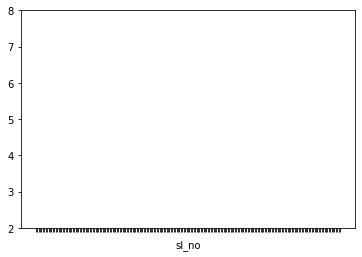

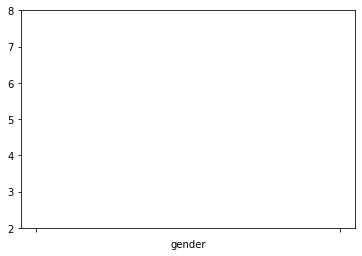

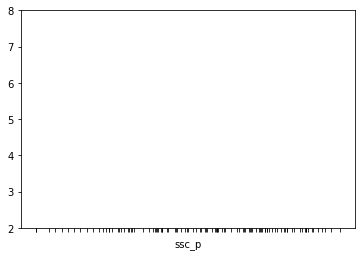

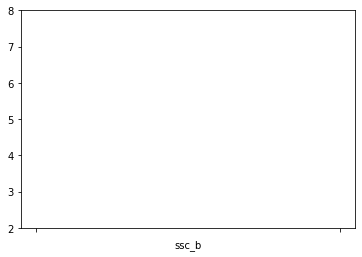

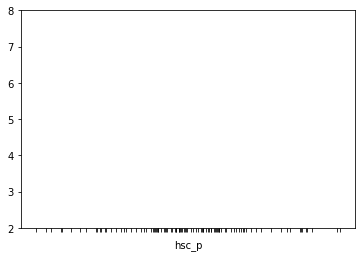

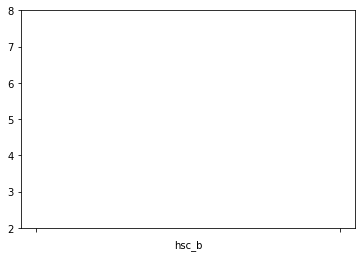

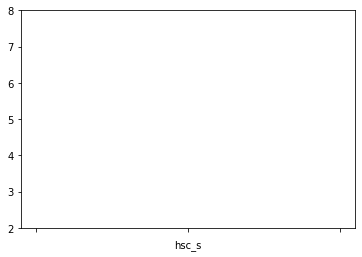

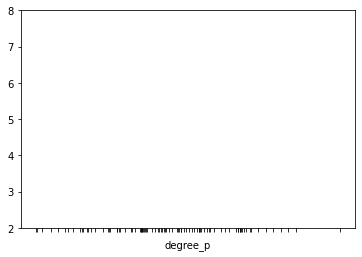

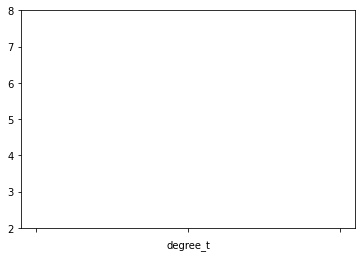

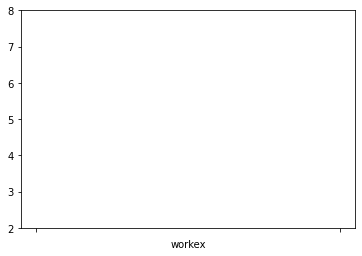

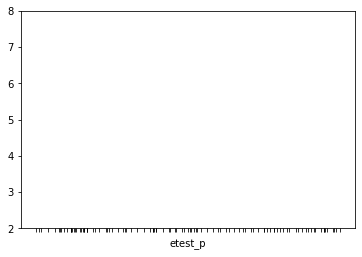

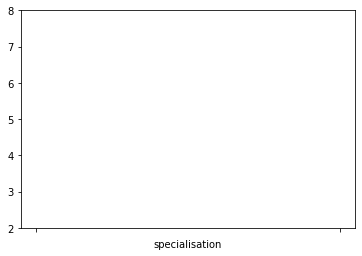

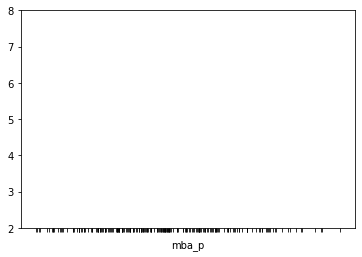

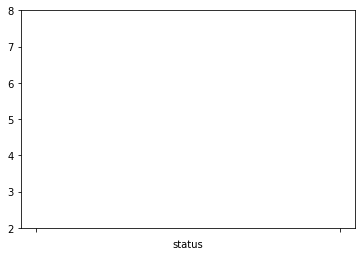

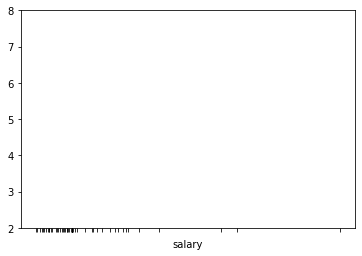

In [ ]:
for v in ['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status', 'salary']:
    pdp(v, MiceImputed, ['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'mba_p',
       'status', 'salary'], 'specialisation')

### **2. Individual conditional expectation (ICE) plot**[14]

ICE is similar to PDP, but what separates the two is ICE plots will show the average effects of the features of interest, along with visualizing the dependence of the prediction on a feature for each sample separately.
That means the plot will contain every instance of prediction change when a feature changes instead of the overall effect in PDP.
Another difference is for ICE plots, only one feature is supported.
What is the benefit of the ICE plot, you ask? It can help us catch an important relationship called the heterogeneous relationship created by interactions. That basically means we can tell whether the individual instances differ from the overall instance (average).
This relationship is obscured by PDP since it’s taking an average. Thus, ICE plots will provide us more insights into the relationship between the feature and the target.

In [ ]:
MiceImputed.columns

Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status', 'salary'],
      dtype='object')

In [ ]:
from time import time
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import QuantileTransformer
from sklearn.neural_network import MLPRegressor

In [ ]:
from time import time
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import QuantileTransformer
from sklearn.neural_network import MLPRegressor

In [ ]:
print("Training MLPRegressor...")
tic = time()
est = make_pipeline(
    QuantileTransformer(),
    MLPRegressor(
        hidden_layer_sizes=(50, 50), learning_rate_init=0.01, early_stopping=True
    ),
)
est.fit(X_train, y_train)
print(f"done in {time() - tic:.3f}s")
print(f"Test R2 score: {est.score(X_test, y_test):.2f}")

Training MLPRegressor...
done in 0.078s
Test R2 score: 0.11


In [ ]:
import matplotlib.pyplot as plt
from sklearn.inspection import partial_dependence
from sklearn.inspection import PartialDependenceDisplay
from time import time
tic = time()

print("Computing partial dependence plots...")
tic = time()
features = ["sl_no", "gender", "ssc_p", "ssc_b", "hsc_p", "hsc_b", "hsc_s",
       "degree_p", "degree_t", "workex", "etest_p", "mba_p",
       "status", "salary"]
display = PartialDependenceDisplay.from_estimator(
    est,
    X_train,
    features,
    kind="both",
    subsample=50,
    n_jobs=3,
    grid_resolution=20,
    random_state=0,
    ice_lines_kw={"color": "tab:blue", "alpha": 0.2, "linewidth": 0.5},
    pd_line_kw={"color": "tab:orange", "linestyle": "--"},
)
print(f"done in {time() - tic:.3f}s")
display.figure_.suptitle(
    "Partial dependence of house value on non-location features\n"
    "for the California housing dataset, with MLPRegressor"
)
display.figure_.subplots_adjust(hspace=0.3)

### **3. Permutation Feature Importance**[14]

Permutation feature importance measures the increase in the model prediction error by shuffling a feature’s values and doing so for each feature.

The word permutation means rearrangement, which in our case applies to the rearrangement of a column’s values.

**Recipe**

- Shuffle values in a specific column, and make predictions.
- Use the predictions to calculate the evaluation metric. - Any drop in performance signifies the importance of the variable and vice versa.
- Move on to the subsequent columns and repeat steps 1 and 2. Do this until you have the importance of every column

In [ ]:
from eli5.sklearn import PermutationImportance
import eli5
perm = PermutationImportance(DTC_Model,n_iter=2).fit(X, y)
eli5.show_weights(perm, feature_names = X.columns.tolist())

In [ ]:
!pip install eli5

### **4-Local interpretable model-agnostic explanations (LIME)**[14]

LIME is a concept that trains local surrogate models around the predictions of a black-box model.

What are local surrogate models? They are interpretable models, i.e., linear regression or decision trees, that can explain the predictions of a black-box model.

What are local surrogate models? They are interpretable models, i.e., linear regression or decision trees, that can explain the predictions of a black-box model.

This means you can use models like decision trees as explanations without actually having to use them to make predictions.
Compared to the previous methods, which are global interpretations, LIME provides local interpretability for a single prediction. This means you zoom in on a single instance, examine what the model predicts for this particular input, and explain why.

**Recipe (source)**

- Select your instance of interest for which you want to have an explanation of its black box prediction.
- Perturb your dataset and get the black box predictions for these new points.
- Weight the new samples according to their proximity to the instance of interest.
- Train a weighted, interpretable model on the dataset with the variations.
- Explain the prediction by interpreting the local model.

In [ ]:
!pip install lime

In [ ]:
import lime
from lime import lime_tabular

explainer = lime_tabular.LimeTabularExplainer(training_data=np.array(X_train),feature_names=X_train.columns,class_names=['bad', 'good'],mode='classification')

In [ ]:
exp = explainer.explain_instance(
    data_row=X_test.iloc[1],
    predict_fn=DTC_Model.predict_proba
)

exp.show_in_notebook(show_table=True)

# **7-Pipelines** [11]

The Pipeline tool in scikit-learn is very helpful to simplify your machine learning models. Pipelines can be used to chain multiple steps into one, so that the data will go through a fixed sequence of steps. Thus, instead of calling every step separately, the pipeline concatenates all steps into one system. To create such a pipeline, we make use of the make_pipeline function.
Below, a simple example is shown, where the pipeline consists of an imputer, which imputes missing values (if there are any), and a logistic regression classifier

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_classification
import pandas as pd
X, y = make_classification(n_samples=25, n_features=4, n_classes=2, random_state=123)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

imputer = SimpleImputer()
clf = LogisticRegression()

pipe = make_pipeline(imputer, clf)

Now, we can use the pipeline to fit our training data and to make predictions for the test data. First, the training data goes through to imputer, and then it starts training using the logistic regression classifier. Then, we are able to predict the classes for our test data:

In [ ]:
pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)
pd.DataFrame({'Prediction': y_pred, 'True': y_test})

**Save a Pipeline model using joblib**

Pipeline models created through scikit-learn can easily be saved by making use of joblib. In case your model contains large arrays of data, each array is stored in a separate file. Once saved locally, one can easily load (or, restore) their model for use in new applications.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_classification
import joblib
X, y = make_classification(n_samples=20, n_features=4, n_classes=2, random_state=123)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

imputer = SimpleImputer()
clf = LogisticRegression()

pipe = make_pipeline(imputer, clf)

pipe.fit(X_train, y_train)
joblib.dump(pipe, 'pipe.joblib')

['pipe.joblib']

Now, the fitted pipeline model is saved (dumped) on your computer through joblib.dump. This model is restored through joblib.load, and can be applied as usual afterwards:

In [ ]:
new_pipe = joblib.load('.../pipe.joblib')
new_pipe.predict(X_test)

# **8-Ensemble techniques**

Similarly, if we aggregate the predictions of a group of models (such as classifiers or regressors), we will often get better predictions than the best individual predictor. A group of predictors is called an **ensemble.** Thus this technique is called **ensemble learning**, and an ensemble learning algorithm is called an **Ensemble Method**.

Ensemble methods improve generalisation of the machine learning solution. As a consequence, they prevent over-fitting.The goal is to create a meta-classifier. This meta-classifier has a better generalisation performance than the individual classifiers.[13]

Think of ensemble meta classifier as a solution where a large number of classifiers are combined to produce more accurate and robust predictions than the predictions by each individual classifier.[13]


As an example of an ensemble method, we can train a group of decision tree classifiers, each on a random subset of the training data. Such an ensemble of decision trees is called a **random forest**. Despite its simplicity, this is one of the most powerful machine learning algorithms available today. In this chapter, we will discuss the most famous ensemble learning methods, including: **Bagging**, **Boosting**, **Voting **& **Stacking**.

## **Principle Voting**[13]

Suppose we have trained a few classifiers, each achieving an 80% accuracy. A very simple way to create an even better classifiers is to aggregate the predictions of all our classifiers and choose the prediction that is the most frequent.

**Majority voting classification is called Hard Voting**



Somewhat surprisingly, this classifier achieves an even better accuracy than the best predictor in the ensemble. Even if each classifier is a weak learner (does slightly better then random guessing). Assuming that we have a sufficient number of weak learners and enough diversity.

Due to the law of large numbers, if we build an ensemble containing 1,000 classifiers with individual accuracies of $51%$ & trained for binary classification, If we predict the majority voting class, we can hope for up to $75%$ accuracy.

This is only true if all classifiers are completely independent, making uncorrelated errors, which is clearly not the case because they are trained on the same data.

One way to get diverse classifiers is use different algorithms for each one of them & train them on different subset of the training data.

One of the most famous ensemble methods is based on the majority voting principle. Imagine we have a number of judges who are voting the candidates in a dancing competition. It is likely that the result of the combined judges will give us better candidates than the result by an individual judge.

The key in majority voting principle is to take the predicted value that received the most number of votes.

### **How Does Ensemble Work?**

Let’s consider that there are five classification algorithms:
- Random forests
- Support vector machines
- Logistic regression classifier
- Boosted Trees
- Nearest Neighbour

Now what we could do is to build an ensemble that combines all of the five classification algorithms into one. We can also try passing and fitting different subsets of our training set into an algorithm to get better predictions.


![](https://drive.google.com/uc?export=view&id=1ljMD_0xWrHuSynn3nMZqiJEuH2Q4wCq8)

Each of the classification algorithm will produce its predictions. We can them perform majority votes principle and take the prediction which occurred the most.

When we combine the classifiers then the total error rate decreases if compared to the error rate of each individual classifier

For example, let’s assume we are predicting whether a stock price will increase or decrease. Three out of five of the algorithms predict that the price will go up. Therefore, we will take the final prediction that the stock price will increase.

Hence ensemble methods produce better predictions and are robust than individual ensembles.

Majority voting is essentially built on top of the Mode mathematical concept, which takes the most occurring value as the average.

### **Training**

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier

model1 = KNeighborsClassifier()
model2 = RandomForestClassifier(n_estimators=50, random_state=0)
model3 = DecisionTreeClassifier(max_depth=1,criterion='entropy')
classifier = VotingClassifier(estimators=[
   ('kn', model1), ('rf', model2), ('dt', model3)], voting='hard')

### **Model evaluation**

In [ ]:
for model in ([model1, model2, model3, classifier]):
     scores = cross_val_score(model, X_test, y_test, cv=3,  scoring='accuracy')
     print(scores)
     print("Accuracy: " % scores.mean())

In [ ]:
classifier.fit(X_train, y_train)


In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
for clf in [model1, model2, model3]:
    clf.fit(X_train, y_train)
    y_hat = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_hat))

After running the code, I encountered that the mean of the ensemble model (VotingClassifer) was better than the other models. It implies that the predictive performance of an ensemble classifier is superior than the performance of the individual classifiers.

VotingClassifier is useful when we have a number of equally well performing models as it can balance out their individual weaknesses.

## **Bootstrap Aggregating or Bagging**[12]

Bagging, which is also known as bootstrap aggregating sits on top of the majority voting principle. The samples are bootstrapped each time when the model is trained. When the samples are chosen, they are used to train and validate the predictions. The samples are then replaced back into the training set. The samples are selected at random. This technique is known as bagging.

To sum up, base classifiers such as decision trees are fitted on random subsets of the original training set. Subsequently, the individual predictions are aggregated (voting or averaging etc). The final results are then used as predictions. It reduces variance of a black box estimator.

### **How does the Bagging works?**

**Bagging can decrease the degree of overfitting**[12]


Imagine you want to find the most visited city in the world next month. To represent the population, you pick a sample of 10000 people. Now imagine this sample is placed in a bag. You take 5000 people out of the bag each time and feed the input to your machine learning model. And then you place the samples back into your bag. Once the results are predicted, you then use the maximum voting to pick the best results.

![](https://drive.google.com/uc?export=view&id=1bAh-egMhWqe28_mhp8PL0jgdG7_17lc6)

**Bagging can improve the accuracy of unstable models**[12]

This recursive nature of picking the samples at random with replacement can improve the accuracy of an unstable machine learning model. Additionally it prevents overfitting and makes your model genaralise better on unseen data

### **Bagging (oob_score=False)**

#### **Model training**

**Machine Learning Bagging In Python**[12]

Finally, this section demonstrates how we can implement bagging technique in Python.

In [ ]:
from sklearn.ensemble import BaggingClassifier
ds = DecisionTreeClassifier(criterion='entropy',max_depth=None)
bag = BaggingClassifier(base_estimator=ds, n_estimators=1000,
                            bootstrap=True, n_jobs=-1,
                            random_state=42)
DTC_Model_bag=bag.fit(X_train, y_train)

#### **Model evaluation**

In [ ]:
y_pred_DT = DTC_Model_bag.predict(X_test)
DT_Acc=DTC_Model_bag.score(X_test, y_test)
print('Accuracy score= {:.4f}'.format(DTC_Model_bag.score(X_test, y_test)))

Accuracy score= 0.5846


The code above will use the default base_estimator of decision tree. It will fit the random samples with replacements. Samples will be taken for all of the features in the training set.

This code will yield results that are more accurate, the model will not be over-fitted to the training set data and most importantly it will reduce the variance of the decision tree.

### **Bagging (oob_score=True)**


Use out-of-bag samples to estimate the generalization accuracy

#### **Model Training**

In [ ]:
from sklearn.ensemble import BaggingClassifier
ds = DecisionTreeClassifier(criterion='entropy',max_depth=None)
bag = BaggingClassifier(base_estimator=ds, n_estimators=1000,
                            bootstrap=True, oob_score=True,
                            n_jobs=-1, random_state=42)
DTC_Model_bag=bag.fit(X_train, y_train)

#### **Model evaluation**

In [ ]:
y_pred_DT = DTC_Model_bag.predict(X_test)
DT_Acc=DTC_Model_bag.score(X_test, y_test)
print('Accuracy score= {:.4f}'.format(DTC_Model_bag.score(X_test, y_test)))

Accuracy score= 0.5846


## **Extremely Randomized Trees**[21]

In extremely randomized trees (see ExtraTreesClassifier and ExtraTreesRegressor classes), randomness goes one step further in the way splits are computed. As in random forests, a random subset of candidate features is used, but instead of looking for the most discriminative thresholds, thresholds are drawn at random for each candidate feature and the best of these randomly-generated thresholds is picked as the splitting rule. This usually allows to reduce the variance of the model a bit more, at the expense of a slightly greater increase in bias:

### **Model Training and Evaluation**

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
clf = DecisionTreeClassifier(max_depth=None, min_samples_split=2, random_state=0)

In [ ]:
scores = cross_val_score(clf, X, y, cv=5)

In [ ]:
scores.mean()

In [ ]:
clf = RandomForestClassifier(n_estimators=10, max_depth=None,min_samples_split=2, random_state=0)

In [ ]:
scores = cross_val_score(clf, X, y, cv=5)

In [ ]:
scores.mean()

0.6046511627906976

In [ ]:
clf = ExtraTreesClassifier(n_estimators=10, max_depth=None,min_samples_split=2, random_state=0)

In [ ]:
scores = cross_val_score(clf, X, y, cv=5)

In [ ]:
scores.mean()

0.5906976744186048

##**Histogram-Based Gradient Boosting** [21]

In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import cross_val_score

In [ ]:
clf_hgb = HistGradientBoostingClassifier(max_iter=100)

In [ ]:
scores_hgb = cross_val_score(clf_hgb, X, y, cv=5)

In [ ]:
scores_hgb.mean()

0.5813953488372092

## **Boosting Methods**

Boosting methods build ensemble model in an increment way. The main principle is to build the model incrementally by training each base model estimator sequentially. In order to build powerful ensemble, these methods basically combine several week learners which are sequentially trained over multiple iterations of training data. The sklearn.ensemble module is having following two boosting methods[21]

### **AdaBoost**

It is one of the most successful boosting ensemble method whose main key is in the way they give weights to the instances in dataset. That’s why the algorithm needs to pay less attention to the instances while constructing subsequent models[21]

#### **Modle Training**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
ADBclf = AdaBoostClassifier(n_estimators = 100, random_state = 0)
ADBclf.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100, random_state=0)

#### **Model evaluation**

In [ ]:
ADBclf.score(X_test, y_test)

#### **Cross Validtion**

In [ ]:
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
seed = 5
kfold = KFold(n_splits = 10, random_state=None,shuffle=False)
num_trees = 50
max_features = 12
ADBclf = AdaBoostClassifier(n_estimators = 100, random_state = 0)
results = cross_val_score(ADBclf, X, y, cv = kfold)
print(results.mean())

0.6


### **LightGBM**

The example below first evaluates an LGBMClassifier on the test problem using repeated k-fold cross-validation and reports the mean accuracy. Then a single model is fit on all available data and a single prediction is made

In [ ]:
# lightgbm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from matplotlib import pyplot
# define dataset
# evaluate the model
model = LGBMClassifier()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
# fit the model on the whole dataset
model = LGBMClassifier()
model.fit(X, y)
# make a single prediction
row = [[2.56999479, -0.13019997, 3.16075093, -4.35936352, -1.61271951, -1.39352057, -2.48924933, -1.93094078, 3.26130366, 2.05692145]]
yhat = model.predict(row)
print('Prediction: %d' % yhat[0])

### **CatBoost**

So putting in simple direct language, CatBoost Algorithm is gradient boosting on Decision Trees. Currently its being used in search , recommendation systems , self-driving cars, weather prediction etc. Another good thing about CatBoost Algorithm is that its open source and can be used by anyone.
Now lets talk about some of its striking points which might make you to use CatBoost Algorithm in your projects[21]

**Why CatBoost may be the Algorithm to go for?**[21]


- You can improve your training results with CatBoost that allows you to use non-numeric factors, instead of having to pre-process your data or spend time and effort turning it to numbers. Isn’t it great? right!
- CatBoost provides great results with default parameters
- It reduces overfitting when constructing your models with a novel gradient-boosting scheme.
- You can train your model on a fast implementation of gradient-boosting algorithm for GPU by using a multi-card configuration for large datasets.

In [ ]:
!pip install catboost
!pip install ipywidgets
!jupyter nbextension enable --py widgetsnbextension

In [ ]:
categorical_features_indices = np.where(X.dtypes != np.float)[0]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_validation, y_train, y_validation = train_test_split(X, y, train_size=0.75, random_state=42)
X_test = X_test

#### **Model training**

In [ ]:
from catboost import CatBoostClassifier, Pool, metrics, cv
from sklearn.metrics import accuracy_score

In [ ]:
model = CatBoostClassifier(
    custom_loss=[metrics.Accuracy()],
    random_seed=42,
    logging_level='Silent'
)
model.fit(
    X_train, y_train,
    cat_features=categorical_features_indices,
    eval_set=(X_validation, y_validation),
#     logging_level='Verbose',  # you can uncomment this for text output
    plot=True
);

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [ ]:
y_pred_Cat = model.predict(X_test)
Cat_Acc=model.score(X_test, y_test)
print('Accuracy score= {:.4f}'.format(model.score(X_test, y_test)))

In [ ]:
cv_params = model.get_params()
cv_params.update({
    'loss_function': metrics.Logloss()
})
cv_data = cv(
    Pool(X, y, cat_features=categorical_features_indices),
    cv_params,
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [ ]:
print('Best validation accuracy score: {:.2f}±{:.2f} on step {}'.format(
    np.max(cv_data['test-Accuracy-mean']),
    cv_data['test-Accuracy-std'][np.argmax(cv_data['test-Accuracy-mean'])],
    np.argmax(cv_data['test-Accuracy-mean'])
))

Best validation accuracy score: 0.66±0.03 on step 4


### **Stacked generalization**[23]

In [ ]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Create Learners per layer
layer_one_estimators = [
                        ('rf_1', RandomForestClassifier(n_estimators=10, random_state=42)),
                        ('knn_1', KNeighborsClassifier(n_neighbors=5))
                       ]
layer_two_estimators = [
                        ('dt_2', DecisionTreeClassifier()),
                        ('rf_2', RandomForestClassifier(n_estimators=50, random_state=42)),
                       ]
layer_two = StackingClassifier(estimators=layer_two_estimators, final_estimator=LogisticRegression())

# Create Final model by
clf = StackingClassifier(estimators=layer_one_estimators, final_estimator=layer_two)
clf.fit(X_train, y_train).score(X_test, y_test)

0.5925925925925926

# **9-Regression Model**

## **11.1-Load important Library**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import sklearn
import warnings
from sklearn.linear_model import LinearRegression
import sys
print("Python Version : ",sys.version)
print("Scikit-Learn Version : ",sklearn.__version__)
warnings.filterwarnings("ignore") ## We'll silent future warnings using this command.
np.set_printoptions(precision=3)

## Beow magic function fits plot inside of current notebook.
## There is another option to it (%matplotlib notebook) which opens plot in new notebook.
%matplotlib inline
import numpy as np
from sklearn.metrics import *

Python Version :  3.10.12 (main, Jun 11 2023, 05:26:28) [GCC 11.4.0]
Scikit-Learn Version :  1.2.2


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

## **11.2-Dataset**

In [ ]:
X, Y = make_regression(n_samples=100, n_features=100, n_informative=1)


## **11.3-Convert data from numpay to Pandas**

In [ ]:
import pandas as pd

X = pd.DataFrame(X)
Y = pd.DataFrame(Y)

## 11.4- **Data Spliting**

In [ ]:
from sklearn.model_selection import train_test_split # Function for splitting dataset into train/test set.
## We can specify either one of train_size and test_size. Sklearn find out other by itself. I included both for explanation purpose.
## random_state is used to reproduce same data splits again. If we don't set random_state then it generates different splits everytime.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, test_size = 0.2, random_state = 123)
print('Train & Test sizes : ',X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

Train & Test sizes :  (80, 100) (20, 100) (80,) (20,)


## **11.5-Data Exploring**

In [ ]:
# Display the first few rows of the training dataset to understand its structure
print(X_train.head())

AttributeError: ignored

In [ ]:
# Check information about the training and test datasets, such as data types and missing values
print(X_train.info())
print(X_test.info())

AttributeError: ignored

## **11.6-Standardization:**



##11.7- **Visualizing the Dataset**


In [ ]:
print(X_train.shape)
print(Y_train.shape)

(80, 100)
(80,)


ValueError: ignored

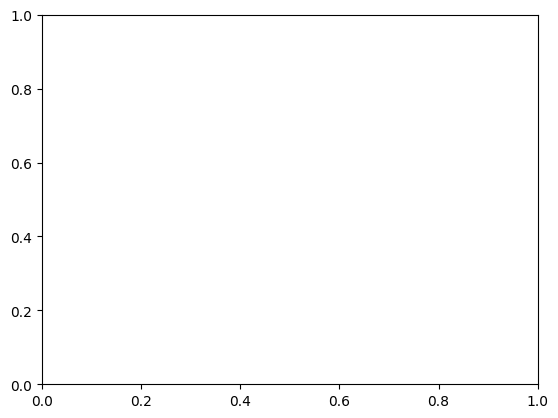

In [ ]:
# Create a scatter plot
plt.scatter(X_train, Y_train)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot of Train Data')
plt.grid(True)  # Enable grid
plt.show()

## **11.8-Linear Regression**

**Limitation of Ordinary Least Square Technique**[18]

- Impacted by Outliers
- Non-linearities
- Too many independent variables
- Multicollinearity
- Heteroskedasticity
- Noise in the Independent Variables

### **Model training**

In [ ]:
from sklearn.linear_model import LinearRegression ## Linear Regression Implementation
linear_regressor = LinearRegression()
linear_regressor

LinearRegression()

#### **Parameters**

In [ ]:
LinearRegression_model= linear_regressor.fit(X_train,Y_train)

In [ ]:
LinearRegression_model.coef_

array([-1.546, -3.251, -1.   , -2.104,  1.283,  0.223, -1.735,  4.912,
       -2.965,  1.438,  2.452, -2.178, -0.633,  2.323, 39.397, -6.492,
       -3.928,  0.475, -1.289,  2.708,  1.478,  6.175, -0.218, -0.523,
        4.503, -1.959, -1.065, -4.146,  2.255, -1.317,  2.859,  2.932,
        3.146,  3.349, -2.091,  2.852,  1.004, -0.934,  0.863, -0.101,
       -2.742,  1.088,  2.934, -1.895, -0.664, -1.916,  0.779, -1.847,
       -0.65 ,  2.782,  3.68 , -3.107,  2.876, -1.148,  1.649, -0.648,
        0.736,  3.754,  0.187, -2.037, -0.999, -2.986, -1.455,  1.038,
        1.454, -0.07 , -1.692, -2.063,  0.31 , -1.853, -1.782, -0.665,
       -3.269, -0.14 ,  2.105, -0.093,  2.506,  0.991,  0.618, -1.567,
       -2.126,  2.54 , -1.677, -1.125, -1.391,  4.28 , -1.025,  0.797,
       -2.082, -1.297, -1.308,  0.223,  1.888,  3.427, -0.517, -3.585,
        0.759, -5.569, -2.05 , -0.888])

In [ ]:
LinearRegression_model.intercept_

2.7636697630145015

### **Evaluating Trained Model**

#### **Prediction on Test Data**

In [ ]:
y_test_pred = linear_regressor.predict(X_test)
print('First Few Actual Housing Prices(Test Data) : ' + str(Y_test[:5]))
print('First Few Predicted Housing Prices(Test Data) : ' + str(y_test_pred[:5]))

First Few Actual Housing Prices(Test Data) : [ -12.058   24.413   13.637   68.403 -122.163]
First Few Predicted Housing Prices(Test Data) : [ -1.593  45.092  16.273  11.204 -59.965]


####**R2 (Mean squared error)**

In [ ]:

# Calculate the mean squared error (MSE) as the evaluation metric to assess model performance
mse = mean_squared_error(Y_test, y_test_pred)
print(f'Mean squared error is: {mse:.4f}')

Mean squared error is: 795.6570


Scikit-Learn's LinearRegresson model has a score() method which returns coefficient of determination R2 based on the dataset and target variables passed to it. It returns a value between [0-1] with 1 being best. If it returns negative value means that the model performed quite bad.

Note: Do not confuse R2 with MSE as both are quite different. One can calculate MSE by using mean_squared_error provided by the metrics module of sklearn.

Formula of R2:

R2=(1−u/v) where

u=MSE=((ytrue−ypred)2).sum() v=((ytrue−ytrue.mean())2).sum()

In [ ]:
print('R^2 Score on Test Data : %.3f'%linear_regressor.score(X_train, Y_train))

R^2 Score on Test Data : 1.000


As we discussed above, linear regression tries to generate lines through data in a way that mean squared error between actual labels and target is least. It is also the reason why its referred to as Ordinary Least Squares by many ML Practitioners as it tries to minimize squared differences between predicted and actual labels. We can access coordinates of that line through coef_ and intercept_ attributes of regressor.

In [ ]:
print('Weight Coefficients : '+ str(linear_regressor.coef_))
print('\nY-Axis Intercept : '+ str(linear_regressor.intercept_))

Weight Coefficients : [-1.546 -3.251 -1.    -2.104  1.283  0.223 -1.735  4.912 -2.965  1.438
  2.452 -2.178 -0.633  2.323 39.397 -6.492 -3.928  0.475 -1.289  2.708
  1.478  6.175 -0.218 -0.523  4.503 -1.959 -1.065 -4.146  2.255 -1.317
  2.859  2.932  3.146  3.349 -2.091  2.852  1.004 -0.934  0.863 -0.101
 -2.742  1.088  2.934 -1.895 -0.664 -1.916  0.779 -1.847 -0.65   2.782
  3.68  -3.107  2.876 -1.148  1.649 -0.648  0.736  3.754  0.187 -2.037
 -0.999 -2.986 -1.455  1.038  1.454 -0.07  -1.692 -2.063  0.31  -1.853
 -1.782 -0.665 -3.269 -0.14   2.105 -0.093  2.506  0.991  0.618 -1.567
 -2.126  2.54  -1.677 -1.125 -1.391  4.28  -1.025  0.797 -2.082 -1.297
 -1.308  0.223  1.888  3.427 -0.517 -3.585  0.759 -5.569 -2.05  -0.888]

Y-Axis Intercept : -2.4675154791024294


#### **Mean Absolute Error (MAE)**[16]

**Mean Absolute Error**[16]

Mean Absolute Error (MAE) is a measure of errors between paired observations expressing the same phenomenon. Examples of Y versus X include comparisons of predicted versus observed, subsequent time versus initial time, and one technique of measurement versus an alternative technique of measurement

- Mean absolute error: It is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since it’s just average error.
- Mean Squared Error (MSE): Mean Squared Error (MSE) is the mean of the squared error. It’s more popular than Mean absolute error because the focus is geared more towards large errors. This is due to the squared term exponentially increasing larger errors in comparison to smaller ones.
- Root Mean Squared Error (RMSE): This is the square root of the Mean Square Error.
- R-squared is not error, but is a popular metric for accuracy of your model. It represents how close the data are to the fitted regression line. The higher the R-squared, the better the model fits your data. Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

In [ ]:
from sklearn.metrics import r2_score
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_test_pred - Y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_test_pred - Y_test) ** 2))
print("R2-score: %.2f" % r2_score(y_test_pred , Y_test) )

Mean absolute error: 19.97
Residual sum of squares (MSE): 795.66
R2-score: 0.69


In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(Y_test, y_test_pred)


19.972624708803117

In [ ]:
from sklearn.metrics import mean_absolute_error as mae

#calculate MAE
mae(Y_test, y_test_pred)

19.972624708803117

In [ ]:
# [17]

train_predict = LinearRegression_model.predict(X_train) mean_squared_error(Y_train, y_test_pred)**0.5
#output:
0.32567881525600667
#test_predict = model.predict(test_house[house_features])
#mean_squared_error(test_house[target], test_predict)**0.5
#Output:
0.32780719274631726

SyntaxError: ignored

#### **Visualize the Regression Line**

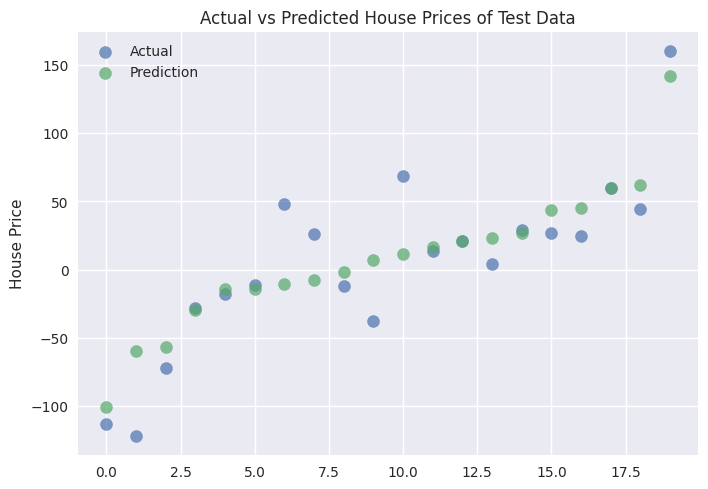

In [ ]:
sorted_labels_acc_to_test_y = list(sorted(zip(Y_test, y_test_pred), key=lambda x: x[1]))
sorted_test_y, sorted_test_preds = zip(*sorted_labels_acc_to_test_y)

with plt.style.context(('ggplot', 'seaborn')):
    plt.scatter(range(len(sorted_test_y)),sorted_test_y, s=75, alpha=0.7, label='Actual')
    plt.scatter(range(len(sorted_test_preds)), sorted_test_preds, s=75, alpha=0.7, label='Prediction')
    plt.ylabel('House Price')
    plt.title('Actual vs Predicted House Prices of Test Data')
    plt.legend(loc='best')

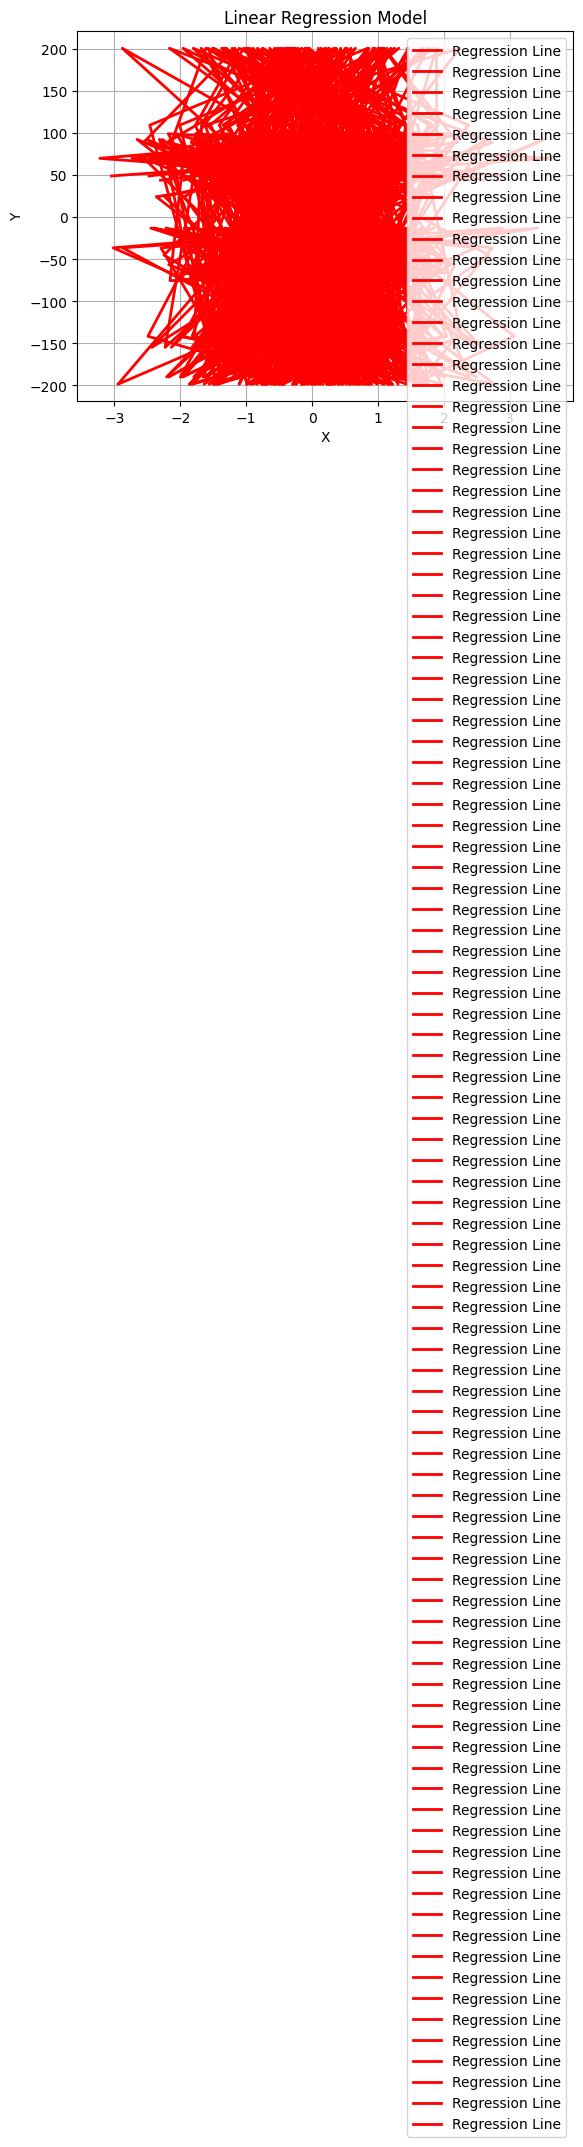

In [ ]:
# Plot the regression line
plt.plot(X_test, y_test_pred, color='red', linewidth=2, label='Regression Line')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression Model')
plt.legend()
plt.grid(True)
plt.show()

## **11.9- Regularized Regression Methods**[18]

- Ridge Regression imposes penalty on size of coef.
- Less impacted by outliers.

### **Model training** [18]

**Adding outliers to data**


In [ ]:
from sklearn import linear_model

In [ ]:
ridge = linear_model.Ridge(alpha=.1)
lr = LinearRegression()

In [ ]:
ridge.fit(X_train,Y_train)
lr.fit(X_train,Y_train)

LinearRegression()

#### **Paramters**[18]

In [ ]:
ridge.coef_


array([-1.567e+00, -3.261e+00, -9.816e-01, -2.088e+00,  1.342e+00,
        2.367e-01, -1.765e+00,  4.831e+00, -2.971e+00,  1.456e+00,
        2.469e+00, -2.185e+00, -5.937e-01,  2.257e+00,  3.919e+01,
       -6.493e+00, -3.924e+00,  4.539e-01, -1.339e+00,  2.714e+00,
        1.477e+00,  6.173e+00, -2.361e-01, -4.805e-01,  4.495e+00,
       -1.978e+00, -1.017e+00, -4.129e+00,  2.238e+00, -1.313e+00,
        2.819e+00,  2.883e+00,  3.085e+00,  3.338e+00, -2.057e+00,
        2.906e+00,  1.003e+00, -8.888e-01,  8.672e-01, -1.363e-01,
       -2.690e+00,  1.091e+00,  2.920e+00, -1.836e+00, -6.274e-01,
       -1.940e+00,  7.102e-01, -1.838e+00, -6.204e-01,  2.793e+00,
        3.642e+00, -3.107e+00,  2.902e+00, -1.116e+00,  1.656e+00,
       -6.632e-01,  8.030e-01,  3.659e+00,  2.383e-01, -2.052e+00,
       -9.718e-01, -3.023e+00, -1.525e+00,  1.078e+00,  1.475e+00,
       -2.253e-02, -1.603e+00, -1.999e+00,  3.074e-01, -1.885e+00,
       -1.635e+00, -6.096e-01, -3.312e+00, -1.075e-01,  2.110e

In [ ]:
lr.coef_


array([-1.546, -3.251, -1.   , -2.104,  1.283,  0.223, -1.735,  4.912,
       -2.965,  1.438,  2.452, -2.178, -0.633,  2.323, 39.397, -6.492,
       -3.928,  0.475, -1.289,  2.708,  1.478,  6.175, -0.218, -0.523,
        4.503, -1.959, -1.065, -4.146,  2.255, -1.317,  2.859,  2.932,
        3.146,  3.349, -2.091,  2.852,  1.004, -0.934,  0.863, -0.101,
       -2.742,  1.088,  2.934, -1.895, -0.664, -1.916,  0.779, -1.847,
       -0.65 ,  2.782,  3.68 , -3.107,  2.876, -1.148,  1.649, -0.648,
        0.736,  3.754,  0.187, -2.037, -0.999, -2.986, -1.455,  1.038,
        1.454, -0.07 , -1.692, -2.063,  0.31 , -1.853, -1.782, -0.665,
       -3.269, -0.14 ,  2.105, -0.093,  2.506,  0.991,  0.618, -1.567,
       -2.126,  2.54 , -1.677, -1.125, -1.391,  4.28 , -1.025,  0.797,
       -2.082, -1.297, -1.308,  0.223,  1.888,  3.427, -0.517, -3.585,
        0.759, -5.569, -2.05 , -0.888])

In [ ]:
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import cross_val_score
 # Load the training data
X = np.array([[1, 1], [1, 2], [1, 3], [2, 1], [2, 2], [2, 3]])
y = [ 6, 8, 10, 7, 9, 11]

In [ ]:
# Create a RidgeCV object
clf = RidgeCV(alphas=[0.0001, 0.001, 0.01, 0.1, 1, 10, 100])
# Fit the model
clf.fit(X, y)
# Make predictions on new data
#y_pred = clf.predict(X_new)
# Performance
print("Root Mean Squared Error (Ridge): ", np.sqrt(-cross_val_score(ridge, X, y, cv=5, scoring='neg_mean_squared_error')).mean())
# Regression coefficients

Root Mean Squared Error (Ridge):  0.11876706362686766


## **11.10-Polynomial regression**

In [ ]:
import numpy as np
import numpy.random as rnd

np.random.seed(42)


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X_train)

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, Y_train)
lin_reg.intercept_, lin_reg.coef_

In [ ]:
y_pred = lin_reg.predict(X_test_poly)
mse = mean_squared_error(y_test, y_pred)
print('MSE:', mse)

## **11.11-LassoCV [24]**

In [ ]:
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNet
from sklearn.model_selection import cross_val_score
#Implementation of LassoCV
lasso = LassoCV(alphas=[0.0001, 0.001, 0.01, 0.1, 1, 10, 100])
#print("Root Mean Squared Error (Lasso): ", np.sqrt(-cross_val_score(lasso, X, Y, cv=10, scoring='neg_mean_squared_error')).mean())
print("Root Mean Squared Error (Ridge): ", np.sqrt(-cross_val_score(lasso, X, y, cv=5, scoring='neg_mean_squared_error')).mean())

Root Mean Squared Error (Ridge):  nan


In [ ]:
import pandas as pd
from sklearn.linear_model import LassoCV
# Load the data data = pd.read_csv("house_prices.csv")
# Split the data into features and target
#features = data.drop("price", axis=1)
#target = data["price"]
# Fit the LassoCV model
model = LassoCV(cv=5).fit(X,Y)
# Print the model coefficients print(model.coef_)

ValueError: ignored

In [ ]:
# Create a new house object
new_house = {"square_feet": 1500, "bedrooms": 3, "bathrooms": 2}
# Convert the new house object to a numpy array
new_house_array = np.array([new_house])
# Make a prediction
prediction = model.predict(new_house_array) # Print the prediction print(prediction)

TypeError: ignored

## **11.12-ElasticNet**

In [ ]:
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNet
from sklearn.model_selection import cross_val_score
#Implementation of ElasticNet
elastic = ElasticNet(alpha=0.001)
print("Root Mean Squared Error (Ridge): ", np.sqrt(-cross_val_score(elastic, X, y, cv=5, scoring='neg_mean_squared_error')).mean())

Root Mean Squared Error (Ridge):  0.004760017663593031


In [ ]:
from sklearn.linear_model import ElasticNet
# Load the data data = pd.read_csv("house_prices.csv")
# Split the data into features and target
#features = data.drop("price", axis=1)
#target = data["price"]
 # Fit the ElasticNet model
model = ElasticNet(alpha=1.0, l1_ratio=0.5).fit(X, Y)
# Print the model coefficients
print(model.coef_)

[-0.000e+00 -1.748e+00  0.000e+00  0.000e+00  0.000e+00 -0.000e+00
  7.773e-01 -7.138e-02 -1.579e+00  2.366e-01  9.488e-01 -3.267e+00
 -0.000e+00  3.662e+00  1.023e+00  1.581e+00  0.000e+00  1.052e+00
  9.587e-01 -1.616e+00  3.794e+00 -4.052e-01  2.159e+00  0.000e+00
 -3.911e-01 -1.050e+00  1.888e+00 -0.000e+00 -8.204e-01 -1.643e+00
  3.263e+00 -9.112e-01 -3.208e+00  1.341e+00 -0.000e+00 -3.717e-01
  2.868e+00  4.196e-01 -3.020e-01  2.060e+00  1.471e+00  0.000e+00
 -1.519e+00  6.396e-01  1.839e+00  2.173e+00 -1.131e+00 -0.000e+00
  0.000e+00 -0.000e+00  1.178e+00 -9.594e-01  0.000e+00 -9.255e-01
 -5.376e-01  2.871e+00  2.706e-01 -2.881e+00  7.204e-01 -2.542e+00
 -3.155e-01 -6.836e-01 -2.982e+00  0.000e+00 -0.000e+00 -1.183e+00
 -8.838e-01 -1.601e+00  1.942e+00  8.284e-01 -2.195e+00 -1.075e+00
  2.307e+00  2.211e+00  0.000e+00  1.992e+00 -1.998e+00  2.329e+00
  2.030e+00  0.000e+00 -1.850e-01  2.916e+00 -1.609e+00  1.121e+00
  1.859e+00 -6.057e-01  2.902e-01  2.429e-01  1.689e+00 -1.661

# **Model Deployment**

Model deployment is the last stage in the data science life cycle project. The main goal of building a data science model is to solve a problem, and a data science model can only do when it is in production and actively in use by consumers.

![](https://drive.google.com/uc?export=view&id=1BqkIHGVhIiry3SNbe41BUAri7LLjr5tR)

# **References**


[1- Scikit-Learn - Ensemble Learning : Bootstrap Aggregation(Bagging) & Random Forests](https://coderzcolumn.com/tutorials/machine-learning/scikit-learn-sklearn-ensemble-learning-bagging-and-random-forests#2.4)

[2- Scikit-Learn - Decision Trees](https://coderzcolumn.com/tutorials/machine-learning/scikit-learn-sklearn-decision-trees#2)

[3- Deep Neural Multilayer Perceptron (MLP) with Scikit-learn](https://towardsdatascience.com/deep-neural-multilayer-perceptron-mlp-with-scikit-learn-2698e77155e)

[4- Akramz
/
Hands-on-Machine-Learning-with-Scikit-Learn-Keras-and-TensorFlow
Public](https://github.com/Akramz/Hands-on-Machine-Learning-with-Scikit-Learn-Keras-and-TensorFlow)

[5- XGBoost hyperparameter tuning in Python using grid search](https://www.mikulskibartosz.name/xgboost-hyperparameter-tuning-in-python-using-grid-search/)

[6- KNN Classifier in Sklearn using GridSearchCV with Example](https://machinelearningknowledge.ai/knn-classifier-in-sklearn-using-gridsearchcv-with-example/)

[7-Decision Tree Classifier in Python Sklearn with Example](https://machinelearningknowledge.ai/decision-tree-classifier-in-python-sklearn-with-example/)

[8- Introducing Trelawney : a unified Python API for interpretation of Machine Learning Models](https://medium.com/analytics-vidhya/introducing-trelawney-a-unified-python-api-for-interpretation-of-machine-learning-models-6fbc0a1fd6e7)

[9-Titanic: explaining predictions with Trelawney](https://www.kaggle.com/aredier/titanic-explaining-predictions-with-trelawney)

[10-Yellowbrick; Machine Learning Visualization-need to implement](https://hersanyagci.medium.com/yellowbrick-machine-learning-visualization-a8c2e9cae78e)

[11-Scikit-Learn (Python): 6 Useful Tricks for Data Scientists](https://levelup.gitconnected.com/scikit-learn-python-6-useful-tricks-for-data-scientists-1a0a502a6aa3)

[12-Machine Learning Bagging](https://medium.com/fintechexplained/machine-learning-bagging-6c0c2d002595)

[13-Let’s Talk About Machine Learning Ensemble Learning In Python](https://medium.com/fintechexplained/lets-talk-about-machine-learning-ensemble-learning-in-python-382747e5fba8)

[14-Making Machine Learning Models Interpretable](https://medium.com/bitgrit-data-science-publication/making-machine-learning-models-interpretable-3f9efcf64a9)

[15-Simple Linear Regression](https://towardsdatascience.com/simple-linear-regression-35b3d940950e)

[16-10 Regression Metrics Data Scientist Must Know (Python-Sklearn Code Included)](https://medium.com/@tzjy/10-regression-metrics-data-scientist-must-know-python-code-included-c6ca40320504)

[17-Regression Algorithm to Predict House Prices in Python](https://pub.towardsai.net/regression-algorithm-to-predict-house-prices-in-python-7722f2d76548)

[18-data-science-complete-tutoria](https://github.com/edyoda/data-science-complete-tutorial/blob/master/4.%20Linear%20Models%20for%20Classification%20%26%20Regression.ipynb)

[19-How to ace machine learning hyperparameter optimization](https://medium.com/analytics-vidhya/how-to-ace-machine-learning-hyperparameter-optimization-78763c97db1)

[20-Sklearn-genetic-opt](https://github.com/rodrigo-arenas/Sklearn-genetic-opt)

[21-What is CatBoost Algorithm? Step-by-Step Tutorial](https://dhavalthakur.medium.com/what-is-catboost-algorithm-step-by-step-tutorial-2c93aa566068)

[22-1.11. Ensemble methods](https://scikit-learn.org/stable/modules/ensemble.html#forests-of-randomized-trees)

[23-Stacking made easy with Sklearn](https://towardsdatascience.com/stacking-made-easy-with-sklearn-e27a0793c92b)

[24-Applied Machine Learning: Part 1](https://medium.com/the-research-nest/applied-machine-learning-part-1-40578469a934)

[Gradient Boosting with Scikit-Learn, XGBoost, LightGBM, and CatBoost](https://machinelearningmastery.com/gradient-boosting-with-scikit-learn-xgboost-lightgbm-and-catboost/)

[New ML algorithms developed by Facebook](https://www.reddit.com/r/MachineLearning/comments/it44ix/r_new_ml_algorithms_developed_by_facebook/)

[An Introduction To Decision Trees and Predictive Analytics](https://towardsdatascience.com/an-introduction-to-decision-trees-and-predictive-analytics-92924a8a77e7)


[What is CatBoost Algorithm? Step-by-Step Tutorial](https://dhavalthakur.medium.com/what-is-catboost-algorithm-step-by-step-tutorial-2c93aa566068)

[Important Links of Articles in Data Science and Deep Learning](https://amitprius.medium.com/important-links-of-articles-in-data-science-and-deep-learning-7b577559d4d1)

[4 Metrics to Evaluate your Regression Models](https://towardsdatascience.com/4-metrics-to-evaluate-your-regression-models-885e9caeee57)

[handson-ml](https://github.com/ageron/handson-ml)

[Regression and Classification Metrics in Machine learning with Python](https://pub.towardsai.net/regression-and-classification-metrics-in-machine-learning-with-python-6d9fcd8b73aa)

[All Machine Learning Algorithms You Should Know in 2022](https://towardsdatascience.com/all-machine-learning-algorithms-you-should-know-in-2022-db5b4ccdf32f)

[Fully Explained K-Nearest Neighbors with Python](https://pub.towardsai.net/fully-explained-k-nearest-neighbors-with-python-ebbe27f93ba9)

[10 Regression Metrics Data Scientist Must Know (Python-Sklearn Code Included)](https://medium.com/@tzjy/10-regression-metrics-data-scientist-must-know-python-code-included-c6ca40320504)

[How Linear Regression Actually work (Maths In-depth Intuition)- Part 2](https://pub.towardsai.net/how-linear-regression-actually-work-maths-in-depth-intuition-part-2-c49a8db03013)

[ML-Ensembles-Methods](https://github.com/Davisy/ML-Ensembles-Methods)

[Parallelized Ensemble Learning Using Python](https://medium.com/mlearning-ai/parallelized-ensemble-learning-using-python-23dc1fe04b3d)

[Introduction to Autoencoders for Anomaly Detection](https://medium.com/artificialis/introduction-to-autoencoders-for-anomaly-detection-a9897591cc72)

[scikit-learn](https://scikit-learn.org/stable/)

[A Tour of Machine Learning Algorithms](https://machinelearningmastery.com/a-tour-of-machine-learning-algorithms/)

[95+ Machine Learning Algorithms & Models Explained with Python](https://medium.com/coders-camp/all-machine-learning-algorithms-models-explained-adcd95d5fb3c)

[Quick Recap : 60 days of Data Science and Machine Learning Series](https://medium.com/coders-mojo/quick-recap-60-days-of-data-science-and-machine-learning-series-457ca0e98279)

[Model Selection in Machine Learning](https://medium.com/@anushkhabajpai/model-selection-in-machine-learning-c568e5a42dcc)

[8 Booming Data Science Libraries You Must Watch Out For in 2022](https://towardsdatascience.com/8-booming-data-science-libraries-you-must-watch-out-in-2022-cec2dbb42437)

[Parallelized Ensemble Learning Using Python](https://medium.com/mlearning-ai/parallelized-ensemble-learning-using-python-23dc1fe04b3d)

[Explainable AI (XAI) — A guide to 7 Packages in Python to Explain Your Models](https://towardsdatascience.com/explainable-ai-xai-a-guide-to-7-packages-in-python-to-explain-your-models-932967f0634b)



